## CAPSTONE : LENDING CLUB

<h2>Objective: Predicting Default/ Charged Off Loans</h2>
<p>Source:&nbsp;<a href="https://www.lendingclub.com/info/download-data.action">https://www.lendingclub.com/info/download-data.action</a>&nbsp;/</p>
<p>Alternate Data can be found from Kaggle</p>
<p>&nbsp;</p>
<h2>Data set Summary / EDA:</h2>
<ul>
<li>74 Columns by >890k Rows</li>
<li>18 object/ strings columns</li>
<li>Fields with NAs are numerous/ of which 18 are dropped.</li>
<li>&nbsp;Simplifying the Target Classes:
<ul>
<li>Initially had 7 classes</li>
<li>Simplified to 4 classes (after multiple iterations of testing with RCF/ Naive Bayes (Multinomial)
<ul>
<li>Definition of Classes / Loan Statuses : <a href="https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-">https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-</a></li>
</ul>
</li>
</ul>
</li>
<li>LabelEncoding as opposed to OHE/ Get_dummies</li>
<li>Feature Selection:
<ul>
<li>Trying to cut down the features needed to perform the test / and simplify the use of a WebApp etc.&nbsp;</li>
<li>'Issue_Year' , 'int_rate', 'grade' ,'verification_status', 'purpose','initial_list_status'
<ul>
<li>See [13.1&nbsp;<strong>Check Classes to Label Encoder</strong>]</li>
</ul>
</li>
</ul>
</li>
</ul>
<p>&nbsp;</p>
<h2>Models Used</h2>
<ul>
<li>LogReg</li>
<li>Naive Bayes</li>
<li>SGDClassifier: Support Vector Machines and Logistic Regression</li>
<li>Random Forest Classifier</li>
</ul>
<h2>Testing / Evaluation:</h2>
<ul>
<li>TTS at 70% Train</li>
<li>Target (Charged Off) - at 5% of the total counts of test set</li>
<li>RCF gives the best score at &gt; 90% accuracy</li>
<li>[<strong>See confusion matrix later</strong>]</li>
</ul>
<p>&nbsp;</p>
<h2>Next Steps:</h2>
<ul>
<li>I am honestly uncomfortable with the high score, something is wrong somewhere. I think it's the feature selection</li>
<li>Then again, it's a very clean data set.</li>
<li>There are 4-5 columns with paragraphs of text
<ul>
<li>Considering of adding an NLP element if possible.</li>
</ul>
</li>
</ul>

## IMPORT STUFF

In [1]:
#  ==== Import Everything  ====
from pprint import pprint as pp2
#  pprint ( )

import csv
import itertools
from collections import Counter
import math
import numpy as np
import re
import string
import scipy as sp
from scipy import stats
from scipy.stats import t

from time import time
from time import sleep
from random import randint

import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.style as style
#  style.available
#  From <https://www.dataquest.io/blog/making-538-plots/>
#  plt.style.use('fivethirtyeight')

#  plt.show() for non Jupyter

#  only for jupyter
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
pd.options.display.max_columns = None
from pandas.io import sql

import seaborn as sns
sns.set_style('whitegrid')
#  sns default is darkgrid or dark

#  check the style sheet
#  sns.axes_style()
#  From <https://seaborn.pydata.org/tutorial/aesthetics.html>

#  https://seaborn.pydata.org/tutorial/aesthetics.html

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
#  print ("Date Time Now: " ,datetime.now().strftime("%Y-%m-%d : %H-%M"))

import statsmodels.api as sm
#  timeseries - autocorrelation - ARMA
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

#  sklearn
from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

#  for K Fold, Gridsearch
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, ShuffleSplit, StratifiedKFold, GridSearchCV

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix, log_loss
#  print (accuracy_score(y_test, predictions))

#  making pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#  Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, SelectFromModel

#  for Regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, LogisticRegression, LogisticRegressionCV, RidgeCV, LassoCV, ElasticNetCV, SGDClassifier


#  for K Nearest Neightbour
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder, MinMaxScaler
#  le =  LabelEncoders()
#  le.classes_
#  scaler = StandardScaler()

from sklearn.neighbors import KNeighborsClassifier

#  clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#  SVC - Classification - Txt Data
from sklearn import svm

#  Randomforest
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# naive bayes
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
#  Xgboost
from xgboost import XGBClassifier

"""#  NLProc - sklearn
#  from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer


# SpaCy
import spacy
nlp = spacy.load('en')
optimizer = nlp.begin_training()

#  NLTK
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Gensim Word2Vec
from gensim.models.word2vec import Word2Vec
"""
# Neural Network
from sklearn.neural_network import MLPClassifier

# Recommender System
from sklearn.metrics.pairwise import cosine_similarity

#  Tensorflow Keras
import tensorflow as tf
from tensorflow import keras
tf.test.gpu_device_name()


print('All Import Finished')

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


All Import Finished


## Import Data

In [2]:
#  import data - 2 mins
file_path = 'loan.csv'
df_raw = pd.read_csv(file_path, low_memory=False, parse_dates=[
                     'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'])
print('File Imported as df_raw')

File Imported as df_raw


In [3]:
#  memory issue with these two columns resolved
"""display(df_raw.columns.values[19], df_raw.iloc[:, 19].unique())
display(df_raw.columns.values[55], df_raw.iloc[:, 55].unique())
display(df_raw.shape)"""

'display(df_raw.columns.values[19], df_raw.iloc[:, 19].unique())\ndisplay(df_raw.columns.values[55], df_raw.iloc[:, 55].unique())\ndisplay(df_raw.shape)'

## Column names

In [4]:
dfkey = df_raw.keys()
len(dfkey)

74

## EDA

### See Samples and headers

In [60]:
X_rfe_col2 = ['term', 'funded_amnt', 'int_rate', 'emp_length', 'out_prncp',
             'total_rec_prncp', 'total_rec_late_fee', 'all_util', 'grade', 'home_ownership']

df_raw[X_rfe_col2].head(5)

term  funded_amnt  int_rate emp_length  out_prncp  total_rec_prncp  \
0   36 months       5000.0     10.65  10+ years        0.0          5000.00   
1   60 months       2500.0     15.27   < 1 year        0.0           456.46   
2   36 months       2400.0     15.96  10+ years        0.0          2400.00   
3   36 months      10000.0     13.49  10+ years        0.0         10000.00   
4   60 months       3000.0     12.69     1 year      766.9          2233.10   

   total_rec_late_fee  all_util grade home_ownership  
0                0.00       NaN     B           RENT  
1                0.00       NaN     C           RENT  
2                0.00       NaN     C           RENT  
3               16.97       NaN     C           RENT  
4                0.00       NaN     B           RENT

In [5]:
display(df_raw.sample(3))
print('-'*40)
pp2(df_raw.info())

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
132342   5635338    7017555     6400.0       6400.0           6400.0   
823950  41021247   43897104    16000.0      16000.0          16000.0   
556874  63455659   67798410     6175.0       6175.0           6175.0   

              term  int_rate  installment grade sub_grade  \
132342   36 months     14.33       219.77     C        C1   
823950   60 months     17.57       402.57     D        D4   
556874   36 months     17.86       222.81     D        D5   

                               emp_title emp_length home_ownership  \
132342      parkwood place nusing center    9 years       MORTGAGE   
823950  Certified Surgical Technologist     2 years       MORTGAGE   
556874         Branch service specialist    2 years           RENT   

        annual_inc verification_status    issue_d loan_status pymnt_plan  \
132342     26000.0            Verified 2013-06-01     Current          n   
823950     64320.0        Not Verified 2015-03-01     Current          n   
556874     20000.0            Verified 2015-10-01     Current          n   

                                                      url desc  \
132342  https://www.lendingclub.com/browse/loanDetail....  NaN   
823950  https://www.lendingclub.com/browse/loanDetail....  NaN   
556874  https://www.lendingclub.com/browse/loanDetail....  NaN   

                   purpose               title zip_code addr_state    dti  \
132342    home_improvement       debt  control    759xx         TX  34.62   
823950    home_improvement    Home improvement    478xx         IN  32.22   
556874  debt_consolidation  Debt consolidation    926xx         CA  32.59   

        delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
132342          0.0       2005-07-01             1.0                     NaN   
823950          0.0       1995-07-01             2.0                    58.0   
556874          2.0       2012-01-01             0.0                    10.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
132342                     NaN       8.0      0.0     6452.0        62.0   
823950                    56.0      26.0      1.0     9513.0        25.2   
556874                     NaN       6.0      0.0      949.0        19.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
132342       23.0                   f    1268.72        1268.72      6597.78   
823950       64.0                   w   14201.63       14201.63      4010.08   
556874        8.0                   f    5911.24        5911.24       439.49   

        total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
132342          6597.78          5131.28        1466.50                 0.0   
823950          4010.08          1798.37        2211.71                 0.0   
556874           439.49           263.76         175.73                 0.0   

        recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
132342         0.0                      0.0   2015-12-01           219.77   
823950         0.0                      0.0   2016-01-01           402.57   
556874         0.0                      0.0   2015-12-01           222.81   

       next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  \
132342   2016-02-01         2016-01-01                         0.0   
823950   2016-02-01         2016-01-01                         0.0   
556874   2016-02-01         2016-01-01                         0.0   

        mths_since_last_major_derog  policy_code application_type  \
132342                          NaN          1.0       INDIVIDUAL   
823950                         58.0          1.0       INDIVIDUAL   
556874                          NaN          1.0       INDIVIDUAL   

        annual_inc_joint  dti_joint verification_status_joint  acc_now_delinq  \
132342               NaN        NaN                       NaN             0.0   
823950               NaN   

----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887

In [6]:
df_raw.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

### See Null Values from DF RAW


In [7]:
names = df_raw.columns.values
null_count = pd.Series(df_raw.isnull().sum().values)
df_nullct = pd.DataFrame(names, columns=['colnme'])
df_nullct['null_count'] = null_count
df_nullct = df_nullct[(df_nullct['null_count'] > 0)]

### Drop Null Values

In [8]:
pp2(len(df_nullct))
print('-'*40)
pp2(df_nullct.values)

40
----------------------------------------
array([['emp_title', 51462],
       ['emp_length', 44825],
       ['annual_inc', 4],
       ['desc', 761351],
       ['title', 152],
       ['delinq_2yrs', 29],
       ['earliest_cr_line', 29],
       ['inq_last_6mths', 29],
       ['mths_since_last_delinq', 454312],
       ['mths_since_last_record', 750326],
       ['open_acc', 29],
       ['pub_rec', 29],
       ['revol_util', 502],
       ['total_acc', 29],
       ['last_pymnt_d', 17659],
       ['next_pymnt_d', 252971],
       ['last_credit_pull_d', 53],
       ['collections_12_mths_ex_med', 145],
       ['mths_since_last_major_derog', 665676],
       ['annual_inc_joint', 886868],
       ['dti_joint', 886870],
       ['verification_status_joint', 886868],
       ['acc_now_delinq', 29],
       ['tot_coll_amt', 70276],
       ['tot_cur_bal', 70276],
       ['open_acc_6m', 866007],
       ['open_il_6m', 866007],
       ['open_il_12m', 866007],
       ['open_il_24m', 866007],
       ['mths_si

In [9]:
#  Back up listing
#    drop null values
"""
to_drop_notnan = ['id', 'member_id']
# --------  --------
to_keep = ['emp_title', 'emp_length', 'annual_in', 'desc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
           'revol_util', 'total_acc', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog',
           'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
# --------  --------
to_drop1 = ['mths_since_last_record', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
            'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

"""
#  ========  ========
"""
display(len(to_keep))
display(len(to_drop_notnan))
display(len(to_drop1))
joinlist = to_drop1 + to_drop_notnan
to_drop = [sublist for sublist in joinlist]
(to_drop)
df_raw = df_raw.drop(labels=to_drop, axis=1)
"""

'\ndisplay(len(to_keep))\ndisplay(len(to_drop_notnan))\ndisplay(len(to_drop1))\njoinlist = to_drop1 + to_drop_notnan\nto_drop = [sublist for sublist in joinlist]\n(to_drop)\ndf_raw = df_raw.drop(labels=to_drop, axis=1)\n'

In [10]:
#  drop null values
to_drop_notnan = ['id', 'member_id', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'last_pymnt_amnt', 'total_pymnt',
                  'total_pymnt_inv', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'inq_last_6mths', 'tot_cur_bal']
# ========  ========

force_features = ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                  'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
                  'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                  'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
                  'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
                  'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
                  'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                  'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
                  'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee',  'last_pymnt_d', 'last_pymnt_amnt',
                  'next_pymnt_d',    'last_credit_pull_d', 'collections_12_mths_ex_med',
                  'mths_since_last_major_derog', 'policy_code', 'application_type',
                  'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                  'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
                  'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
                  'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
                  'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
# ========  ========
force_features1 = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                   'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
                   'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                   'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
                   'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
                   'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
                   'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                   'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
                   'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                   'recoveries', 'collection_recovery_fee',  'last_pymnt_d', 'last_pymnt_amnt',
                   'next_pymnt_d',    'last_credit_pull_d', 'collections_12_mths_ex_med',
                   'mths_since_last_major_derog', 'application_type', 'annual_inc_joint',
                   'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
                   'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
                   'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
                   'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
force_features2 = []

In [11]:
df_raw1 = df_raw[force_features1]
#  df_raw1.head(2)

In [12]:
# get list of int
df_int64 = df_raw1.select_dtypes(include=['int64'])
df_flt64 = df_raw1.select_dtypes(include=['float64'])
df_dt64 = df_raw1.select_dtypes(include=['datetime64'])
df_o = (df_raw1.select_dtypes(include=['object']))
display(df_int64.shape, df_flt64.shape, df_dt64.shape, df_o.shape)

(887379, 0)

(887379, 48)

(887379, 5)

(887379, 17)

In [13]:
#  fill int
lst_int64 = list(df_int64.columns.values)
#  fill flt
lst_flt64 = list(df_flt64.columns.values)
df_raw1[lst_flt64] = df_raw1[lst_flt64].fillna(value=0, axis=1)
#  fill Date
lst_dt64 = list(df_dt64.columns.values)
df_raw1[lst_dt64] = df_raw1[lst_dt64].fillna(pd.Timestamp('20691231'), axis=1)
#  fill Objects ?
lst_o = list(df_o.columns.values)

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [14]:
"""# Calculate what is 20% of 866007
thresh = round(len(df_raw.index)*0.2)
#  thresh
# find a way to drop items that have 90% NaN
df_raw_thresh = df_raw.dropna(axis=1, thresh=thresh)
df_raw_thresh = df_raw_thresh.drop(labels=to_drop_notnan, axis=1)
#  df_raw_thresh.info()"""

'# Calculate what is 20% of 866007\nthresh = round(len(df_raw.index)*0.2)\n#  thresh\n# find a way to drop items that have 90% NaN\ndf_raw_thresh = df_raw.dropna(axis=1, thresh=thresh)\ndf_raw_thresh = df_raw_thresh.drop(labels=to_drop_notnan, axis=1)\n#  df_raw_thresh.info()'

### Copy df_raw to df_raw2

In [15]:
#  df_raw2 = df_raw.copy()
#  df_raw2 = df_raw_thresh.copy()
df_raw2 = df_raw1

In [16]:
#  df_raw2.columns.values

### Copy df, add year to the df

In [17]:
#  change the empy length to appropriate values
"""
emp_length
array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)
"""
#  ========  ========


def emplength(x):
    if x == '< 1 year':
        return 0.5
    elif x == '1 year':
        return 1
    elif x == '2 years':
        return 2
    elif x == '3 years':
        return 3
    elif x == '4 years':
        return 4
    elif x == '5 years':
        return 5
    elif x == '6 years':
        return 6
    elif x == '7 years':
        return 7
    elif x == '8 years':
        return 8
    elif x == '9 years':
        return 9
    elif x == '10+ years':
        return 10
    elif x is None:
        return 0
    else:
        return x


#  ========  ========
df_raw2['emp_length'] = df_raw2['emp_length'].map(lambda x: (emplength(x)))
df_raw2['emp_length'].fillna(0, inplace=True)
df_raw2['emp_length'].unique()

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


array([10. ,  0.5,  1. ,  3. ,  8. ,  9. ,  4. ,  5. ,  6. ,  2. ,  7. ,
        0. ])

### Copy to df from df_raw2

In [18]:
#  Make a copy of the df, add year to the df
df = df_raw2.copy()
# Add Year to the df
df['Issue_Year'] = pd.DatetimeIndex(df['issue_d']).year
df['sub_grade'] = df['sub_grade'].map(lambda x: int(x[-1:], 10))
df['term'] = df['term'].apply(lambda x: int(x[0:3]))

In [19]:
#  df.columns.values

In [20]:
# Loan_Status Unique
"""
'Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'

https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-
"""
# --------  --------


def lnsts(x):
    if x == 'Issued':
        return 'Current'
    elif x == 'Current':
        return 'Current'
# --------  --------
    elif x == 'Fully Paid':
        return 'Fully Paid'
# --------  --------
    elif x == 'In Grace Period':
        return 'Charged Off'
    elif x == 'Late (16-30 days)':
        return 'Charged Off'
    elif x == 'Late (31-120 days)':
        return 'Charged Off'
# --------  --------     
    elif x == 'Charged Off':
        return 'Charged Off'
    elif x == 'Default':
        return 'Charged Off'
# --------  --------
    elif x == 'Does not meet the credit policy. Status:Fully Paid':
        return 'Fully Paid'
    elif x == 'Does not meet the credit policy. Status:Charged Off':
        return 'Charged Off'
# --------  --------
    else:
        return x


# --------  --------
#  display(lnsts('Fully Paid'))
df['loan_status_sht'] = df['loan_status'].map(lambda x: lnsts(x))

## Cleaning Dataset and it's columns - encoding

### NLP?

In [21]:
# NLP?
df_nlp = df[['emp_title', 'title']]
#  df_nlp = df[['emp_title', 'desc', 'title']]
display(df_nlp.sample(5))
display(df_nlp.isnull().sum())

emp_title                    title
660512                  parts specialist       Debt consolidation
252715                   Project Manager       Debt consolidation
712192                    Store Manager        Debt consolidation
492739  Gas Transmission Maintenance Man       Debt consolidation
765835                    Senior Manager  Credit card refinancing

emp_title    51462
title          152
dtype: int64

In [22]:
# drop the fully paid off

df = df[df.loan_status_sht != 'Fully Paid']
df.reset_index(drop=True, inplace=True)
df.shape

(677668, 72)

In [23]:
# Select object type
df_int64 = df.select_dtypes(include=['int64'])
df_flt64 = df.select_dtypes(include=['float64'])
df_dt64 = df.select_dtypes(include=['datetime64'])
df_o = (df.select_dtypes(include=['object']))
#
df_misc = df_raw[['emp_title']]

In [24]:
namesflt64 = df_flt64.columns.values
null_countflt64 = pd.Series(df_flt64.isnull().sum().values)
df_nullctflt64 = pd.DataFrame(namesflt64, columns=['colnme'])
df_nullctflt64['null_count'] = null_countflt64
df_nullctflt64 = df_nullctflt64[(df_nullctflt64['null_count'] > 0)]
print(df_nullctflt64)

Empty DataFrame
Columns: [colnme, null_count]
Index: []


In [25]:
#  df_flt64 = df_flt64.fillna(0)
#  display(df_flt64.head(3))

#  Do not use for final train df
#  display(df_dt64.isnull().sum())

display(df_int64.shape, df_dt64.shape,
        df_flt64.shape, df_o.shape, df_misc.shape)

(677668, 3)

(677668, 5)

(677668, 49)

(677668, 15)

(887379, 1)

In [26]:
# len(df_o.columns.values)
df_o.sample(3)

grade                  emp_title home_ownership verification_status  \
551280     E  Administrative assistant        MORTGAGE     Source Verified   
476909     B                    teacher       MORTGAGE     Source Verified   
157644     B           technical writer           RENT        Not Verified   

       loan_status pymnt_plan  \
551280     Current          n   
476909     Current          n   
157644     Current          n   

                                                      url desc  \
551280  https://www.lendingclub.com/browse/loanDetail....  NaN   
476909  https://www.lendingclub.com/browse/loanDetail....  NaN   
157644  https://www.lendingclub.com/browse/loanDetail....  NaN   

               purpose                    title zip_code addr_state  \
551280     credit_card  Credit card refinancing    323xx         FL   
476909  major_purchase           Major purchase    432xx         OH   
157644     credit_card  Credit card refinancing    078xx         NJ   

       initial_list_status application_type loan_status_sht  
551280                   f       INDIVIDUAL         Current  
476909                   w       INDIVIDUAL         Current  
157644                   f       INDIVIDUAL         Current

### Object Columns Names

In [27]:
# Object Columns Names
df_o_col_nme = df_o.columns.values
display(df_o_col_nme)

array(['grade', 'emp_title', 'home_ownership', 'verification_status',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'initial_list_status',
       'application_type', 'loan_status_sht'], dtype=object)

### Note: to remove, change items

In [28]:
# remove = 'url', 'desc', 'zip_code', 'emp_title'
# change date = 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'
# change item = 'term' to numbers. 'sub_grade' remove the alphabet

### Drop the Loan_Status because it's a target

In [29]:
# Drop the Loan_Status because it's a target
df_o = df_o.drop(labels=['emp_title', 'loan_status', 'url', 'desc', 'title',
                         'zip_code', 'loan_status_sht'], axis=1)
"""
df_o = df_o.drop(labels=['emp_title','loan_status', 'url', 'title',
                         'zip_code',  'loan_status_sht'], axis=1)
"""

"\ndf_o = df_o.drop(labels=['emp_title','loan_status', 'url', 'title',\n                         'zip_code',  'loan_status_sht'], axis=1)\n"

In [30]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677668 entries, 0 to 677667
Data columns (total 8 columns):
grade                  677668 non-null object
home_ownership         677668 non-null object
verification_status    677668 non-null object
pymnt_plan             677668 non-null object
purpose                677668 non-null object
addr_state             677668 non-null object
initial_list_status    677668 non-null object
application_type       677668 non-null object
dtypes: object(8)
memory usage: 41.4+ MB


In [31]:
#  create df_dummy for get_dummies items in df_o
"""df_o_1 = df_o.iloc[:, 0:]
df_dummy = []
for colnum, colnme in enumerate(df_o_1.columns):
    df_curr = pd.get_dummies(df_o_1.iloc[:, colnum], prefix=colnme,drop_first=True)
    df_dummy.append(df_curr)

df_dummy = pd.concat(df_dummy, axis=1)
df_dummy.head()"""

'df_o_1 = df_o.iloc[:, 0:]\ndf_dummy = []\nfor colnum, colnme in enumerate(df_o_1.columns):\n    df_curr = pd.get_dummies(df_o_1.iloc[:, colnum], prefix=colnme,drop_first=True)\n    df_dummy.append(df_curr)\n\ndf_dummy = pd.concat(df_dummy, axis=1)\ndf_dummy.head()'

In [32]:
# labelEncode the objects
# do something to y to LabelEncode
from sklearn.preprocessing import LabelEncoder

df_o_labenc = pd.DataFrame()
df_o_labenctbl = pd.DataFrame([0], columns=['Dummy'])

for colno, colnme in enumerate(df_o):
    le1 = LabelEncoder()
    le1.fit(df_o.iloc[:, colno])

    y = le1.transform(df_o.iloc[:, colno])
    z = list(le1.classes_)

    df_o_labenc[colnme] = y
    df_o_labenctbl = pd.concat(
        [pd.DataFrame(z, columns=[colnme]), df_o_labenctbl], axis=1)

In [33]:
# df_raw2.sample(5)
display(df_o_labenc.head(5), df_o_labenctbl.head())

grade  home_ownership  verification_status  pymnt_plan  purpose  \
0      2               5                    1           0        0   
1      1               5                    1           0        9   
2      2               5                    0           0        2   
3      5               4                    1           0       11   
4      1               5                    2           0        9   

   addr_state  initial_list_status  application_type  
0          10                    0                 0  
1          37                    0                 0  
2          27                    0                 0  
3           4                    0                 0  
4          43                    0                 0

application_type initial_list_status addr_state             purpose  \
0       INDIVIDUAL                   f         AK                 car   
1            JOINT                   w         AL         credit_card   
2              NaN                 NaN         AR  debt_consolidation   
3              NaN                 NaN         AZ         educational   
4              NaN                 NaN         CA    home_improvement   

  pymnt_plan verification_status home_ownership grade  Dummy  
0          n        Not Verified            ANY     A    0.0  
1          y     Source Verified       MORTGAGE     B    NaN  
2        NaN            Verified           NONE     C    NaN  
3        NaN                 NaN          OTHER     D    NaN  
4        NaN                 NaN            OWN     E    NaN

In [34]:
# copy to df_dummy, stupid I know.
# LabelEncode the object items into df_dummy
#  display(df_o.sample(3),df_o_labenc.sample(3))

#  df_o_1 = df_o
df_dummy = df_o_labenc.copy()
display(df_dummy.sample(5))

grade  home_ownership  verification_status  pymnt_plan  purpose  \
593854      4               5                    2           0        1   
91087       6               1                    2           0        2   
242840      2               1                    2           0        2   
253370      1               1                    1           0        2   
397285      1               1                    1           0        4   

        addr_state  initial_list_status  application_type  
593854          34                    0                 0  
91087            4                    0                 0  
242840          43                    1                 0  
253370          20                    0                 0  
397285          43                    1                 0

## Check Distributions

In [35]:
#  y = range(df['annual_inc'].min,df['annual_inc'].max)

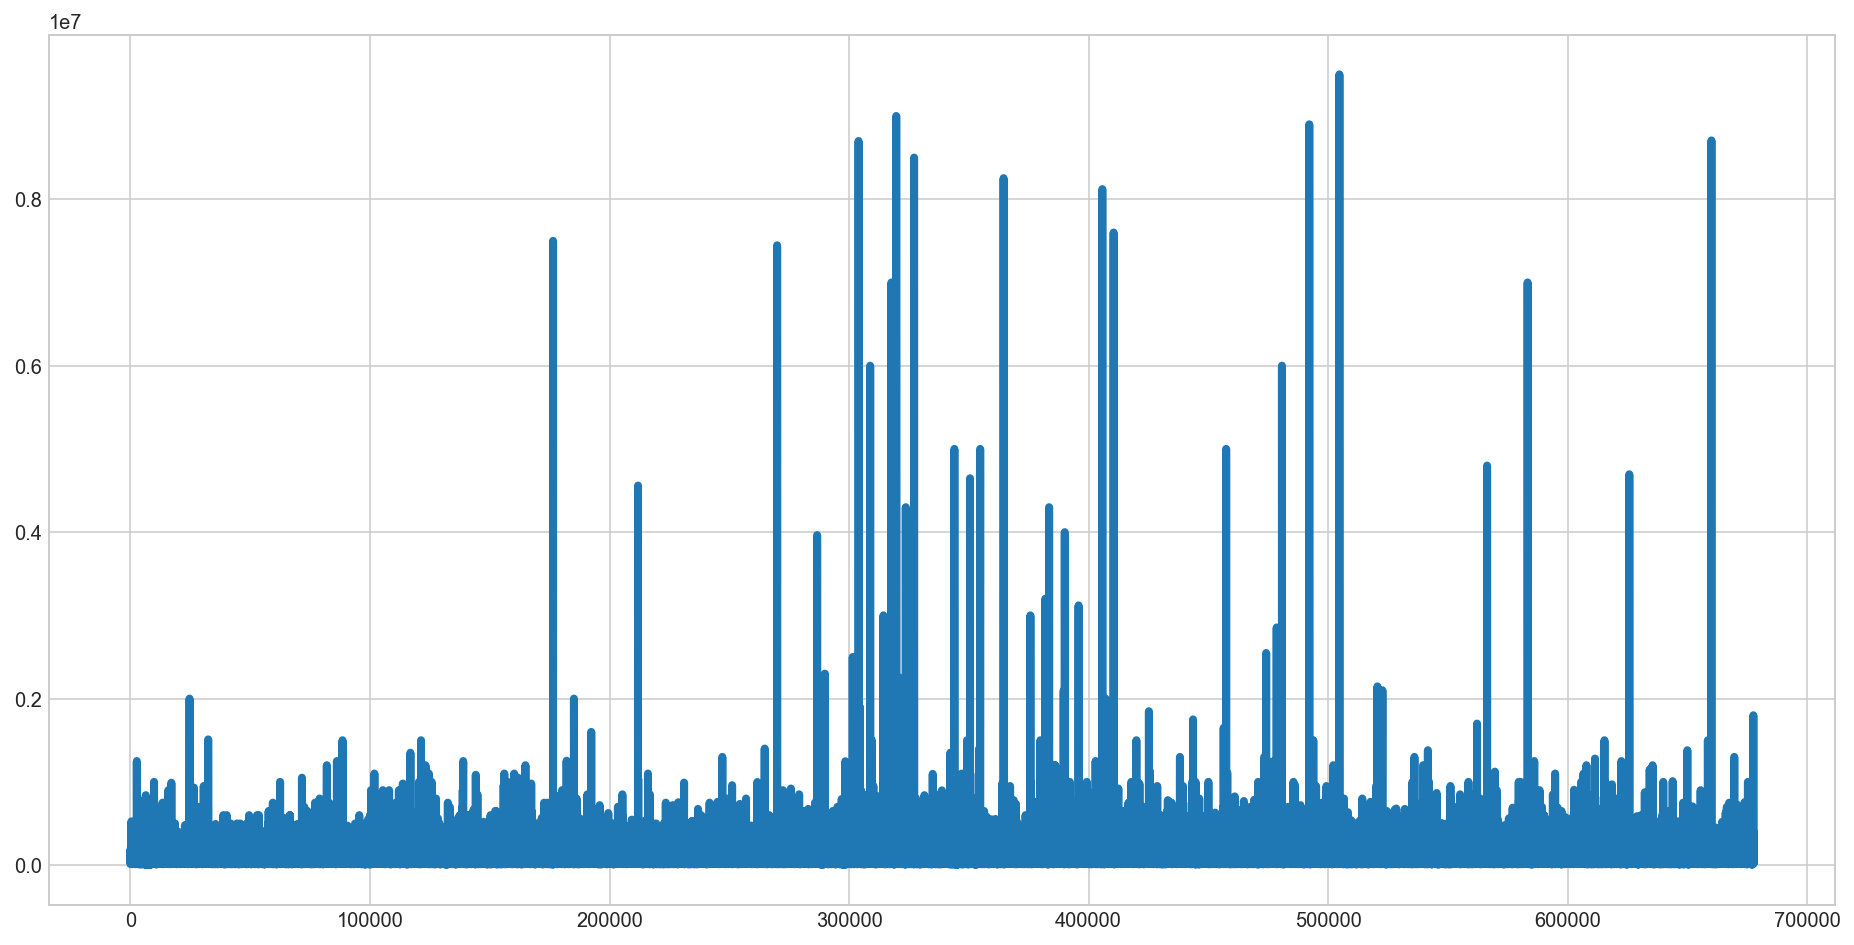

In [36]:
x = df.annual_inc
fig, ax1 = plt.subplots()
plt.style.use('fivethirtyeight')
fig.set_size_inches(16, 8)
ax1.plot(x)
plt.show()

In [37]:
df['funded_amnt'].max()
df['emp_length'].max()
df['out_prncp'].min()
df['total_rec_prncp'].max()
df['total_rec_late_fee'].max()
df['all_util'].max()
df['grade'].unique()
#df['home_ownership'].max()


array(['C', 'B', 'F', 'D', 'A', 'E', 'G'], dtype=object)

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total amount committed by investors')

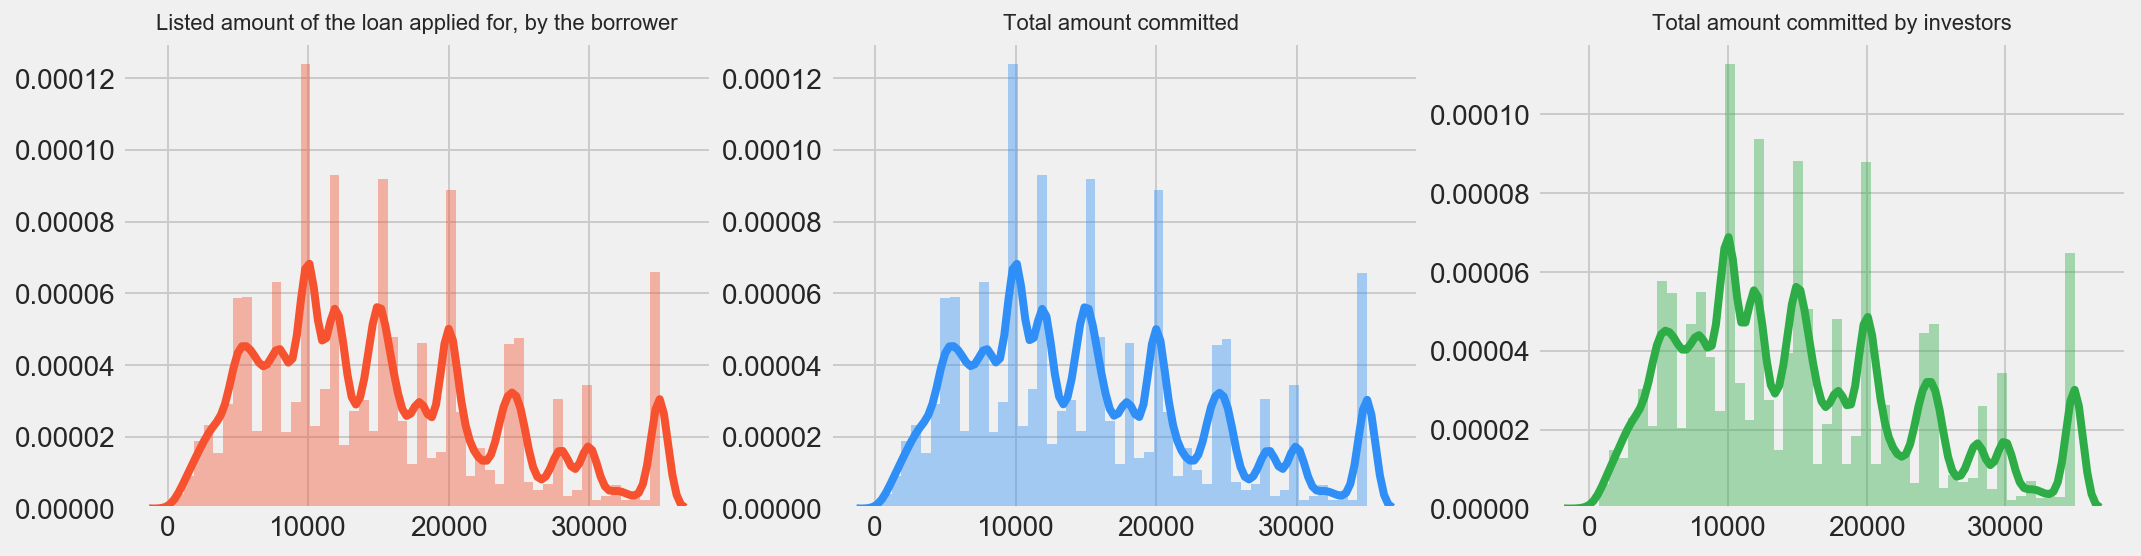

In [38]:
# Check Distributions
fig, ax = plt.subplots(1, 3, figsize=(16, 4))

loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values
investor_funds = df["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title(
    "Listed amount of the loan applied for, by the borrower", fontsize=11)

sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Total amount committed ", fontsize=11)

sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total amount committed by investors", fontsize=11)

Text(0,0.5,'Average loan amount issued')

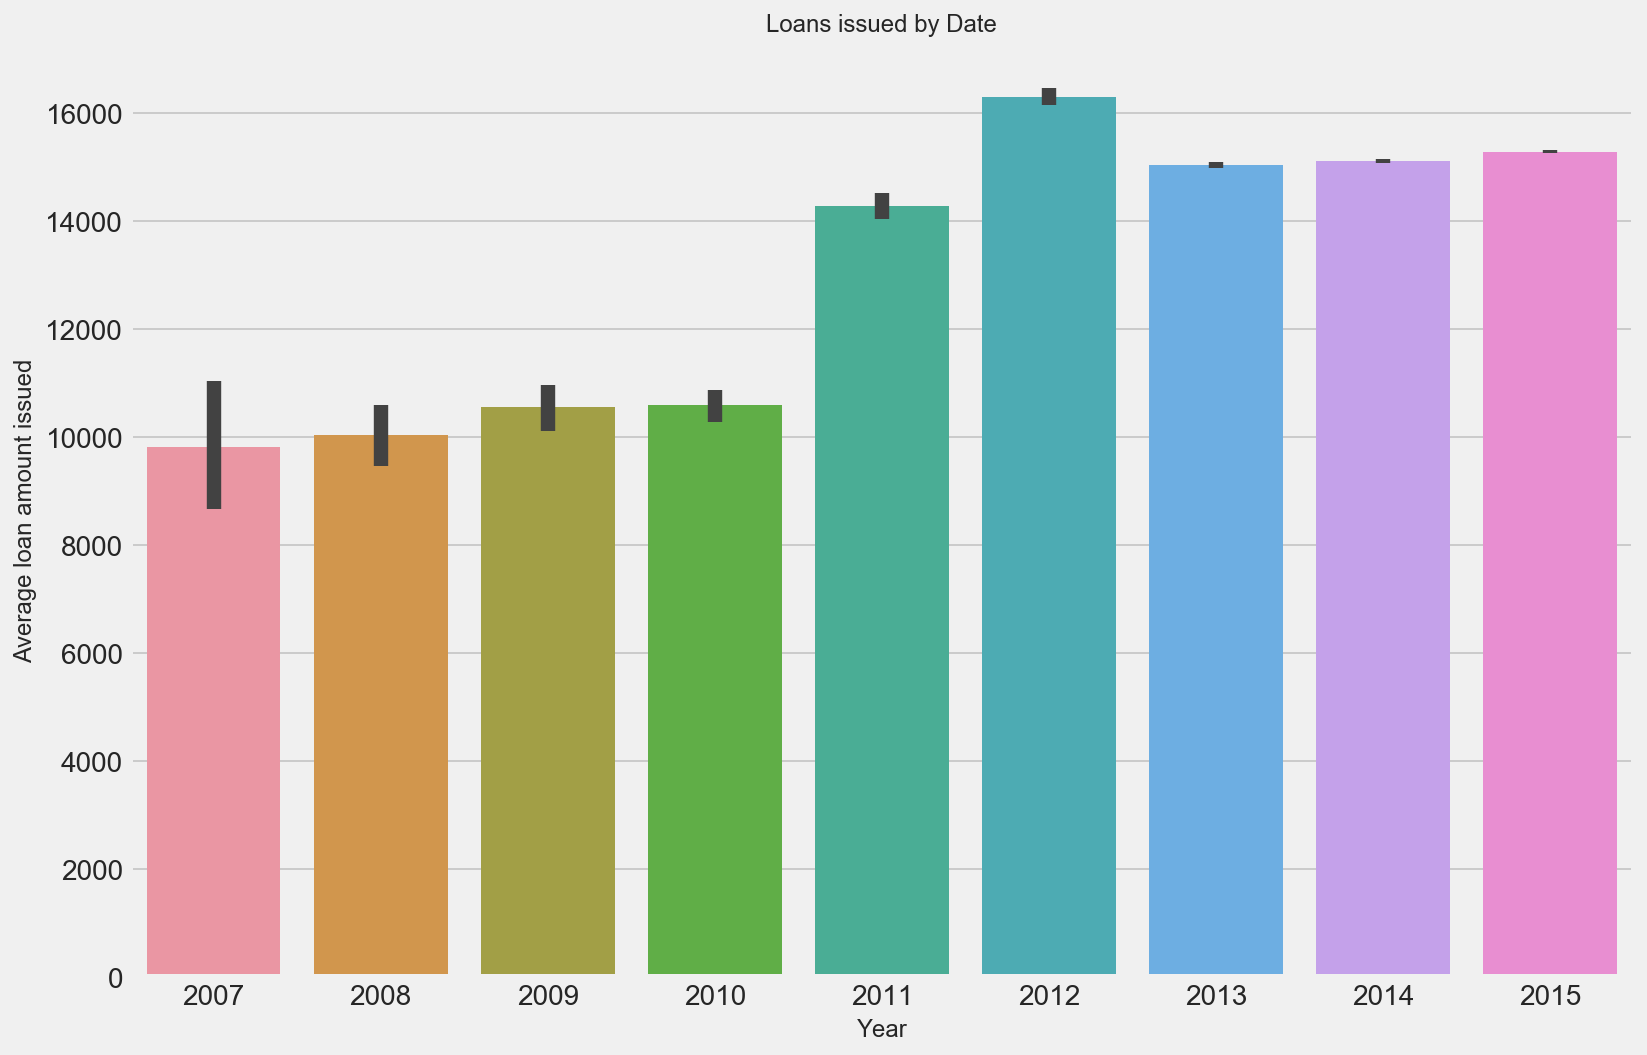

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot('Issue_Year', 'loan_amnt', data=df)
plt.title('Loans issued by Date', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average loan amount issued', fontsize=12)

Text(0,0.5,'Loan amount')

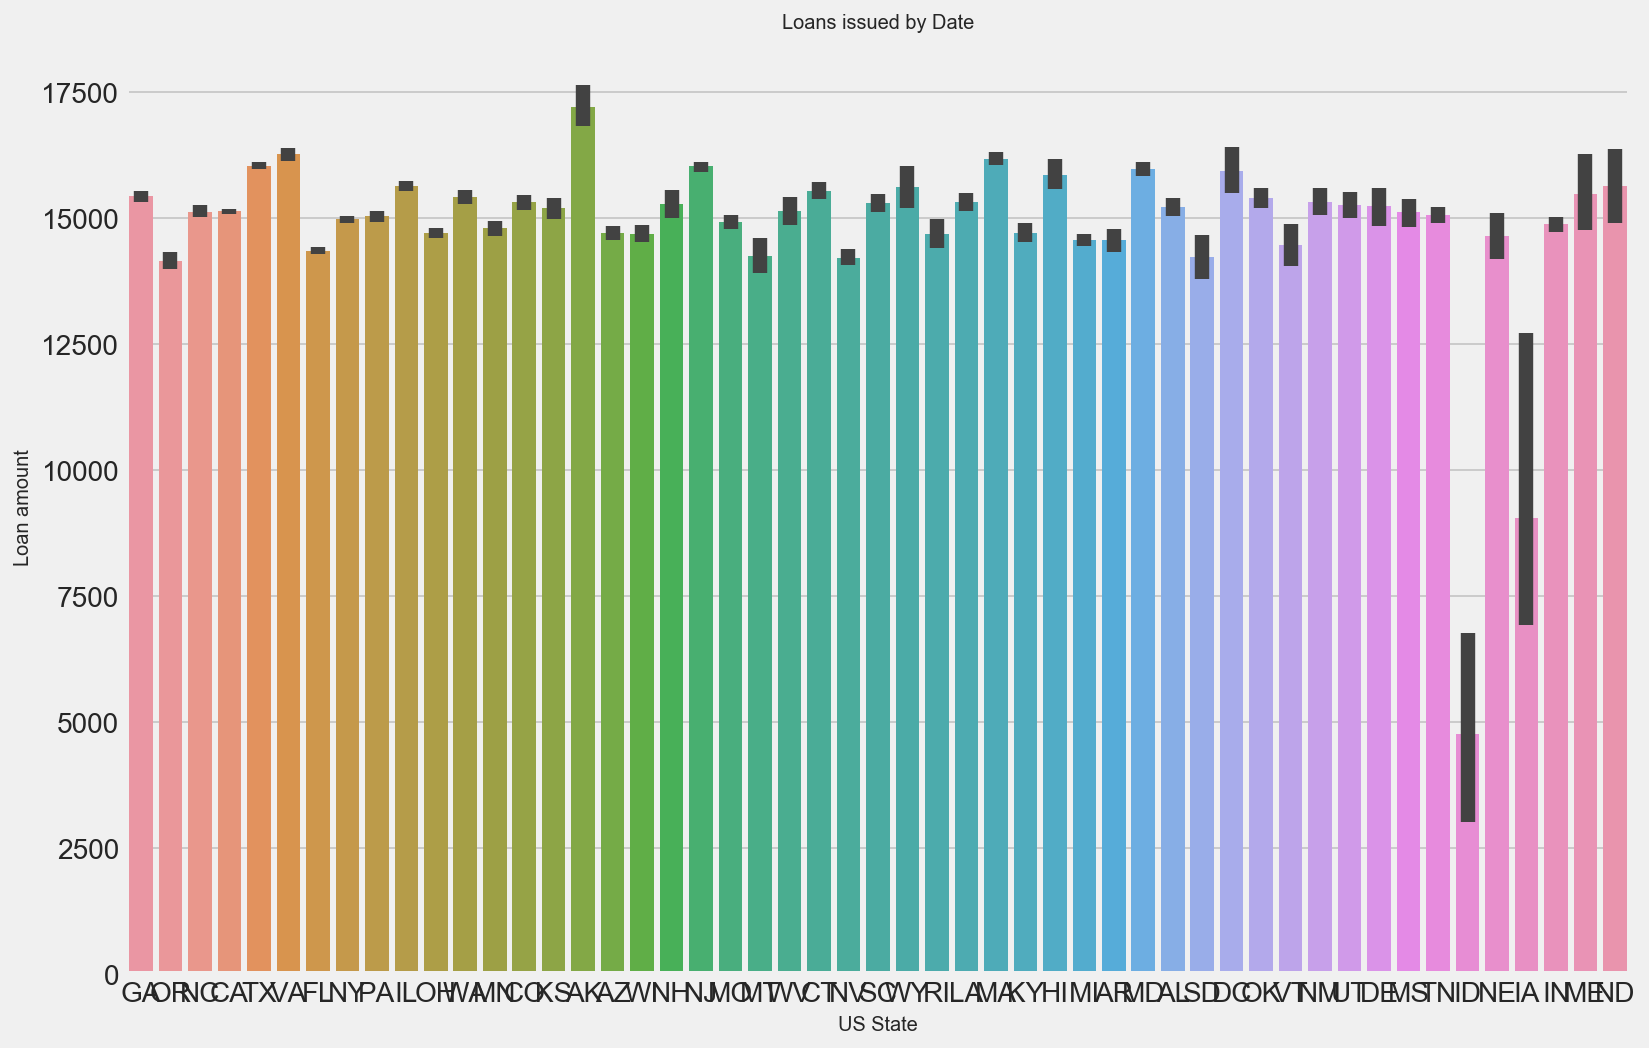

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot('addr_state', 'loan_amnt', data=df)
plt.title('Loans issued by Date', fontsize=10)
plt.xlabel('US State', fontsize=10)
plt.ylabel('Loan amount', fontsize=10)

In [41]:
a2 = len(df[df['loan_status_sht'] == 'Charged Off']['loan_status_sht'])
b2 = len(df[df['loan_status_sht'] == 'Current']['loan_status_sht'])

print(a2,b2)

67429 610239


Text(0.5,1,'Loan Status Count')

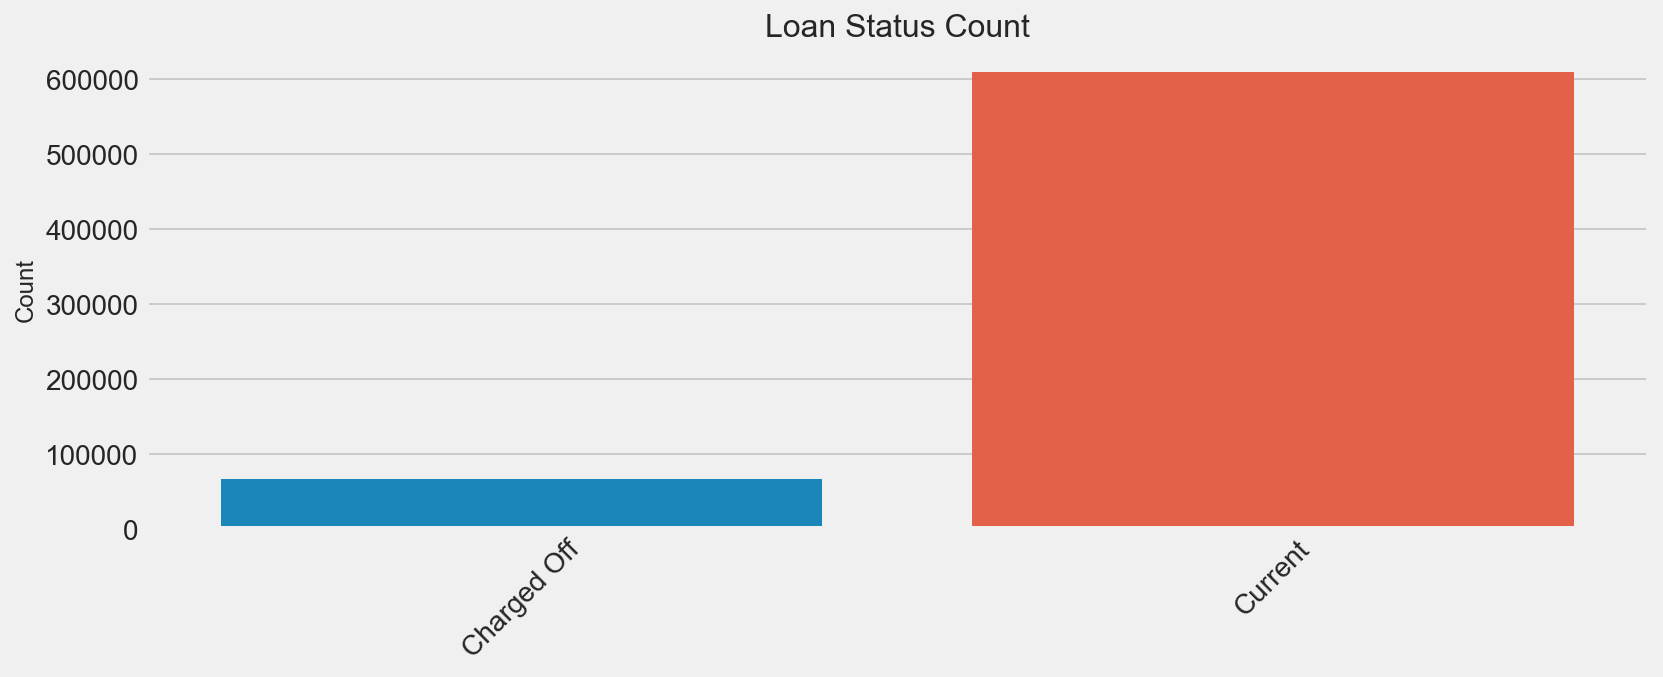

In [42]:
plt.figure(figsize=(12, 14))

plt.subplot(311)
g = sns.countplot(x="loan_status_sht", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Loan Status Count", fontsize=16)

No handles with labels found to put in legend.


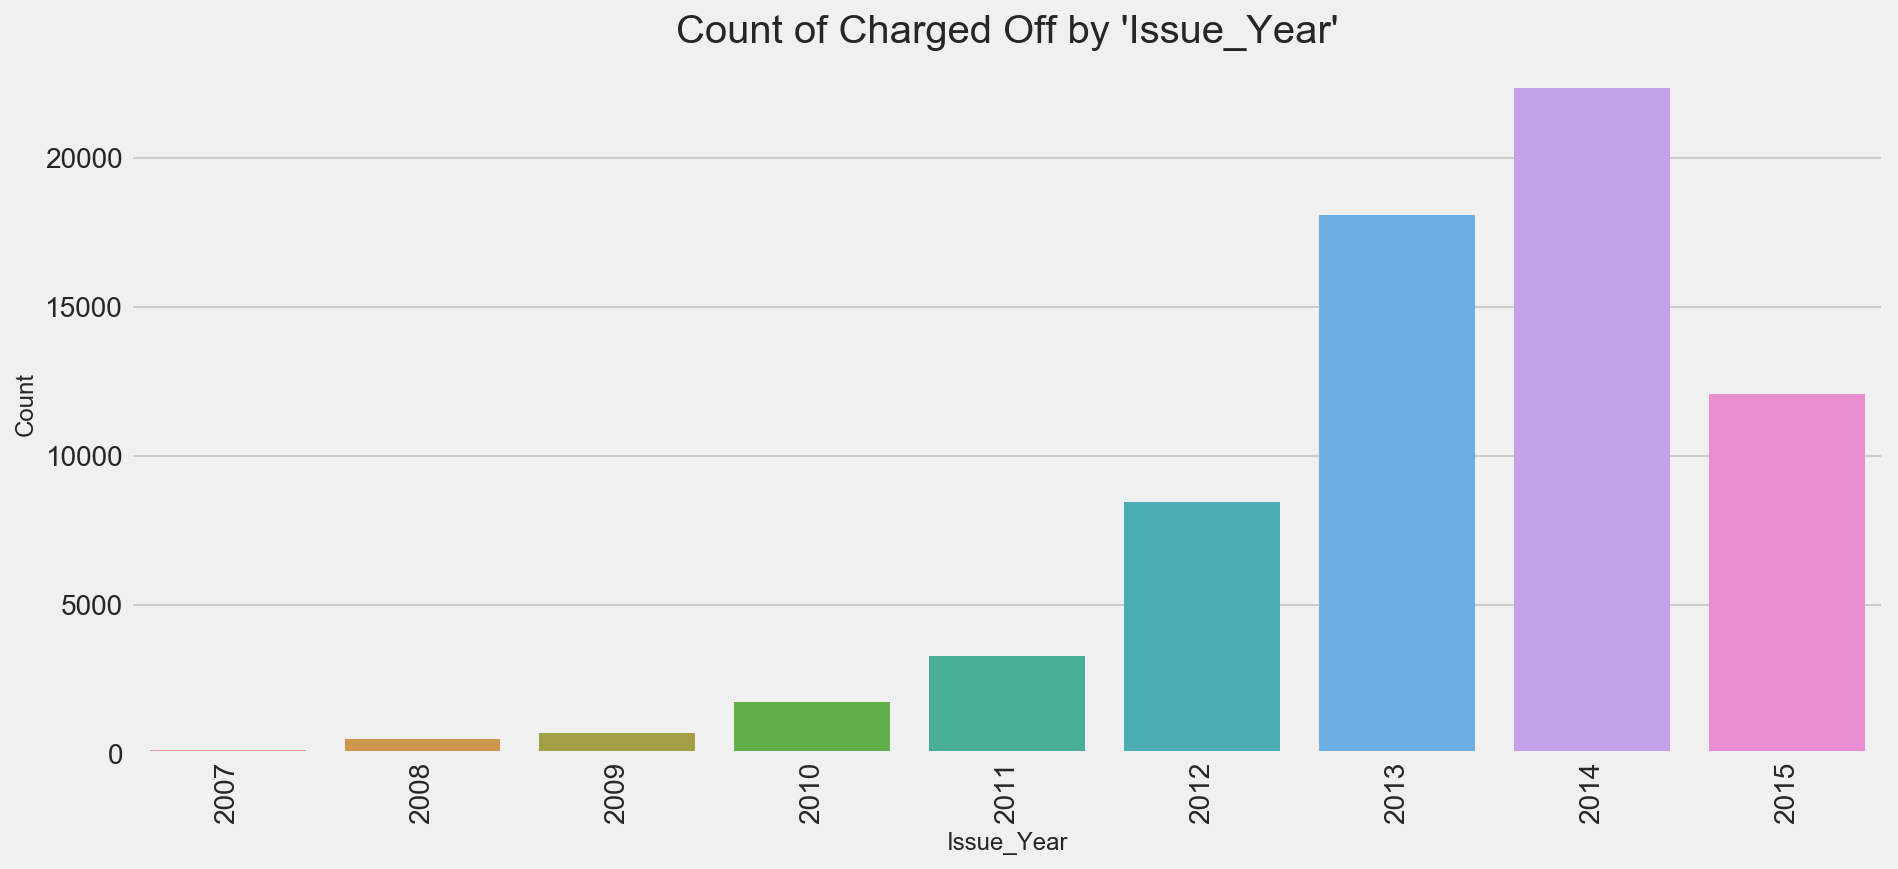

In [43]:
plt.figure(figsize=(14, 6))
# Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(
    x='Issue_Year', data=df[df['loan_status_sht'] == 'Charged Off'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel("Issue_Year", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.legend(loc='upper left')
g.set_title("Count of Charged Off by 'Issue_Year'", fontsize=20)
plt.show()

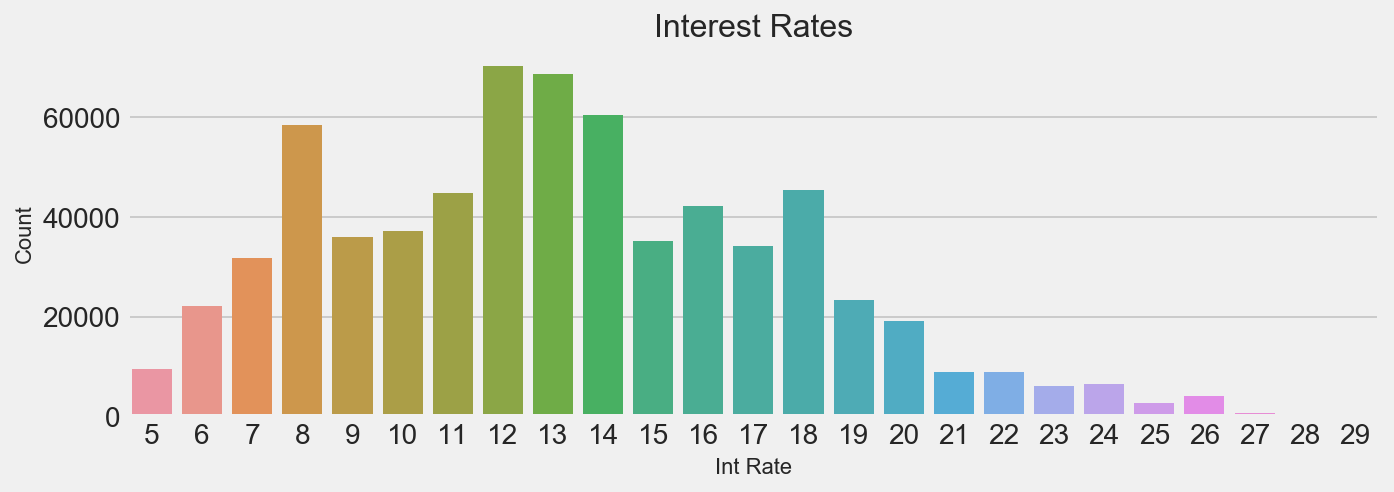

In [44]:
df['int_round'] = df['int_rate'].round(0).astype(int)

plt.figure(figsize=(10, 8))

# Exploring the Int_rate

plt.subplot(212)
g1 = sns.countplot(x="int_round", data=df)
g1.set_xlabel("Int Rate", fontsize=11)
g1.set_ylabel("Count", fontsize=11)
g1.set_title("Interest Rates", fontsize=16)

plt.subplots_adjust(wspace=0.2, hspace=0.6, top=0.9)

plt.show()

In [45]:
# Exploring the loan_status x purpose
state_loan = ['addr_state', 'loan_status_sht']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df[state_loan[0]], df[state_loan[1]]
            ).style.background_gradient(cmap=cm)

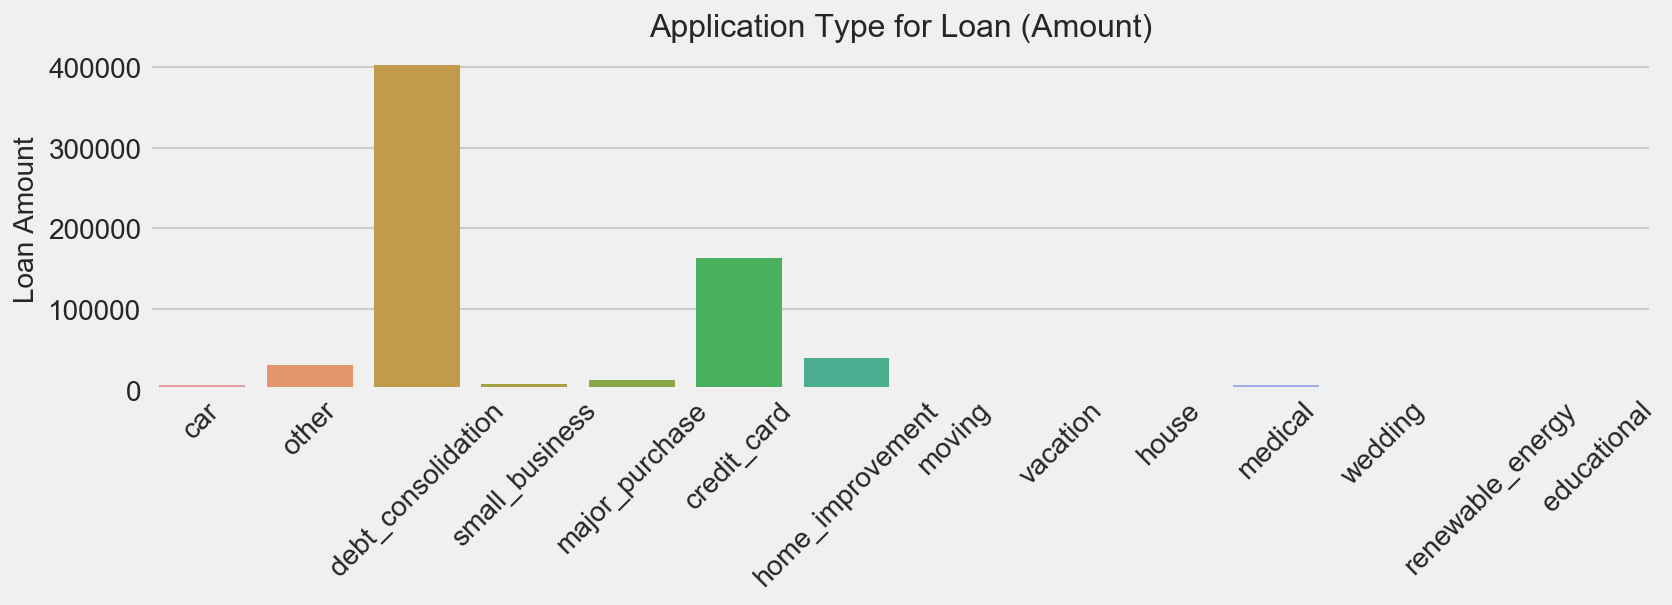

In [46]:
plt.figure(figsize=(12, 8))

plt.subplot(211)
g = sns.countplot(x="purpose", data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("Application Type for Loan (Amount)", fontsize=16)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=14)


plt.subplots_adjust(wspace=0.2, hspace=0.8, top=0.9)
plt.show()

In [47]:
a = len(df[df['grade'] == 'A']['grade'])
b = len(df[df['grade'] == 'B']['grade'])
c = len(df[df['grade'] == 'C']['grade'])
d = len(df[df['grade'] == 'D']['grade'])
e = len(df[df['grade'] == 'E']['grade'])
f = len(df[df['grade'] == 'F']['grade'])
g = len(df[df['grade'] == 'G']['grade'])

print(a,b,c,d,e,f,g)

108433 187720 192701 109028 57399 18166 4221


No handles with labels found to put in legend.


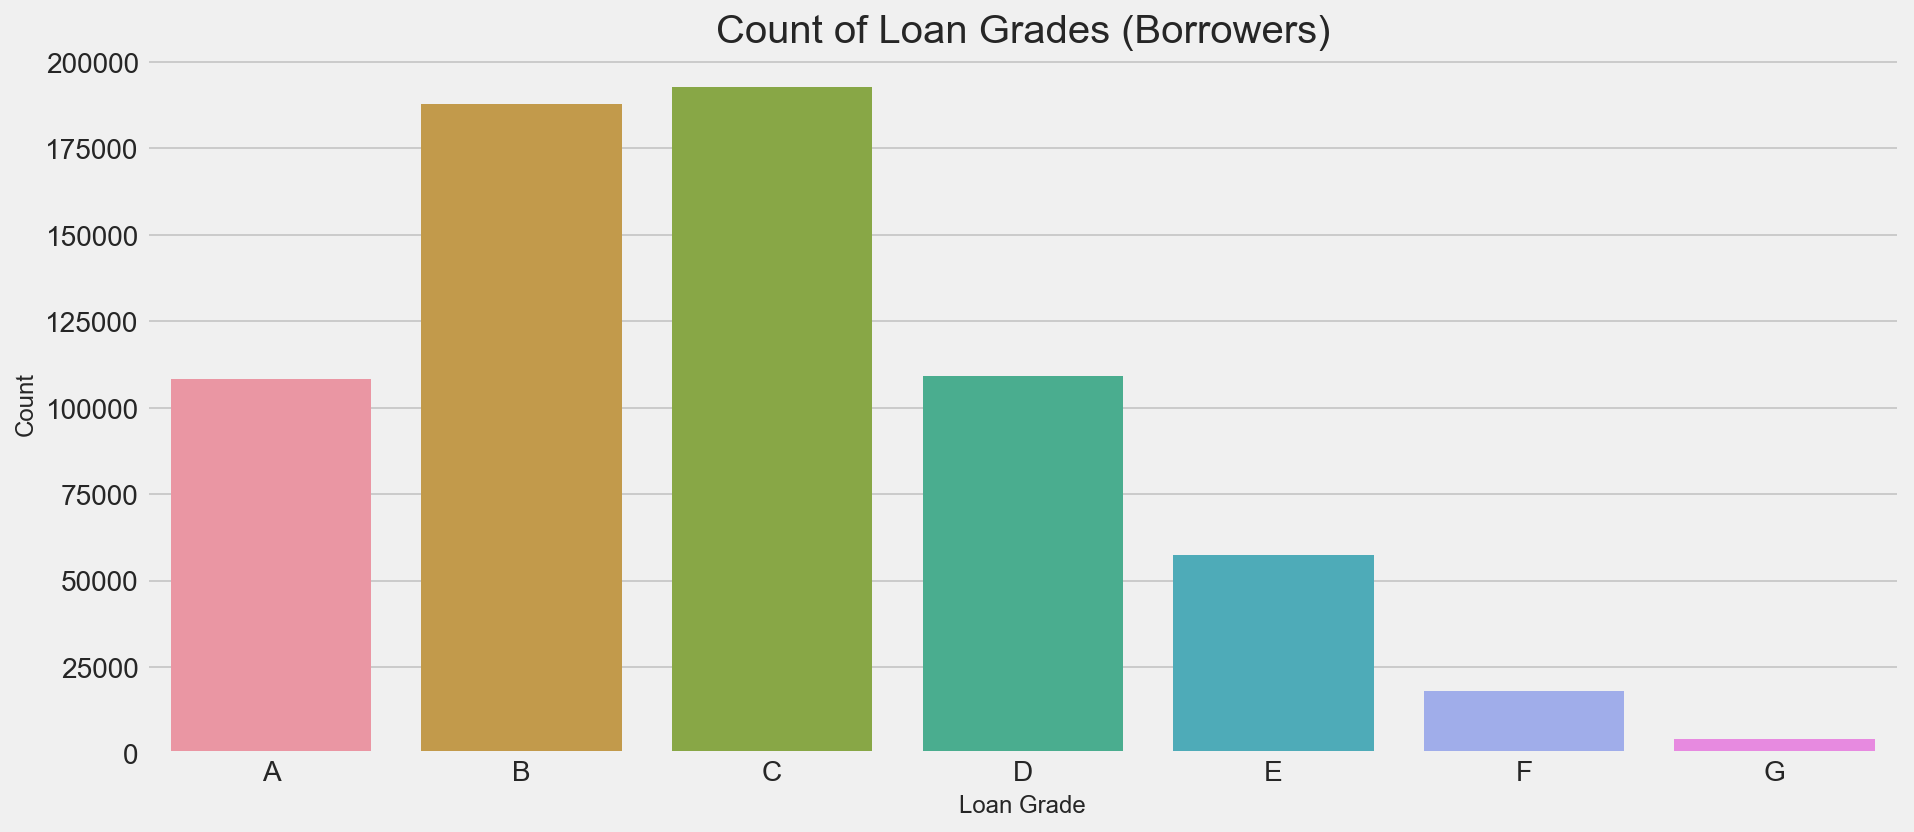

In [48]:
plt.figure(figsize=(14, 6))
# Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(
    x='grade', data=df,order='ABCDEFG')
g.set_xticklabels(g.get_xticklabels(), rotation=0)
g.set_xlabel("Loan Grade", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.legend(loc='upper left')
g.set_title("Count of Loan Grades (Borrowers)", fontsize=20)
plt.show()

In [49]:
a2 = len(df[df['home_ownership'] == 'RENT']['home_ownership'])
b2 = len(df[df['home_ownership'] == 'OWN']['home_ownership'])
c2 = len(df[df['home_ownership'] == 'MORTGAGE']['home_ownership'])
print(a2,b2,c2)

270560 69372 337683


No handles with labels found to put in legend.


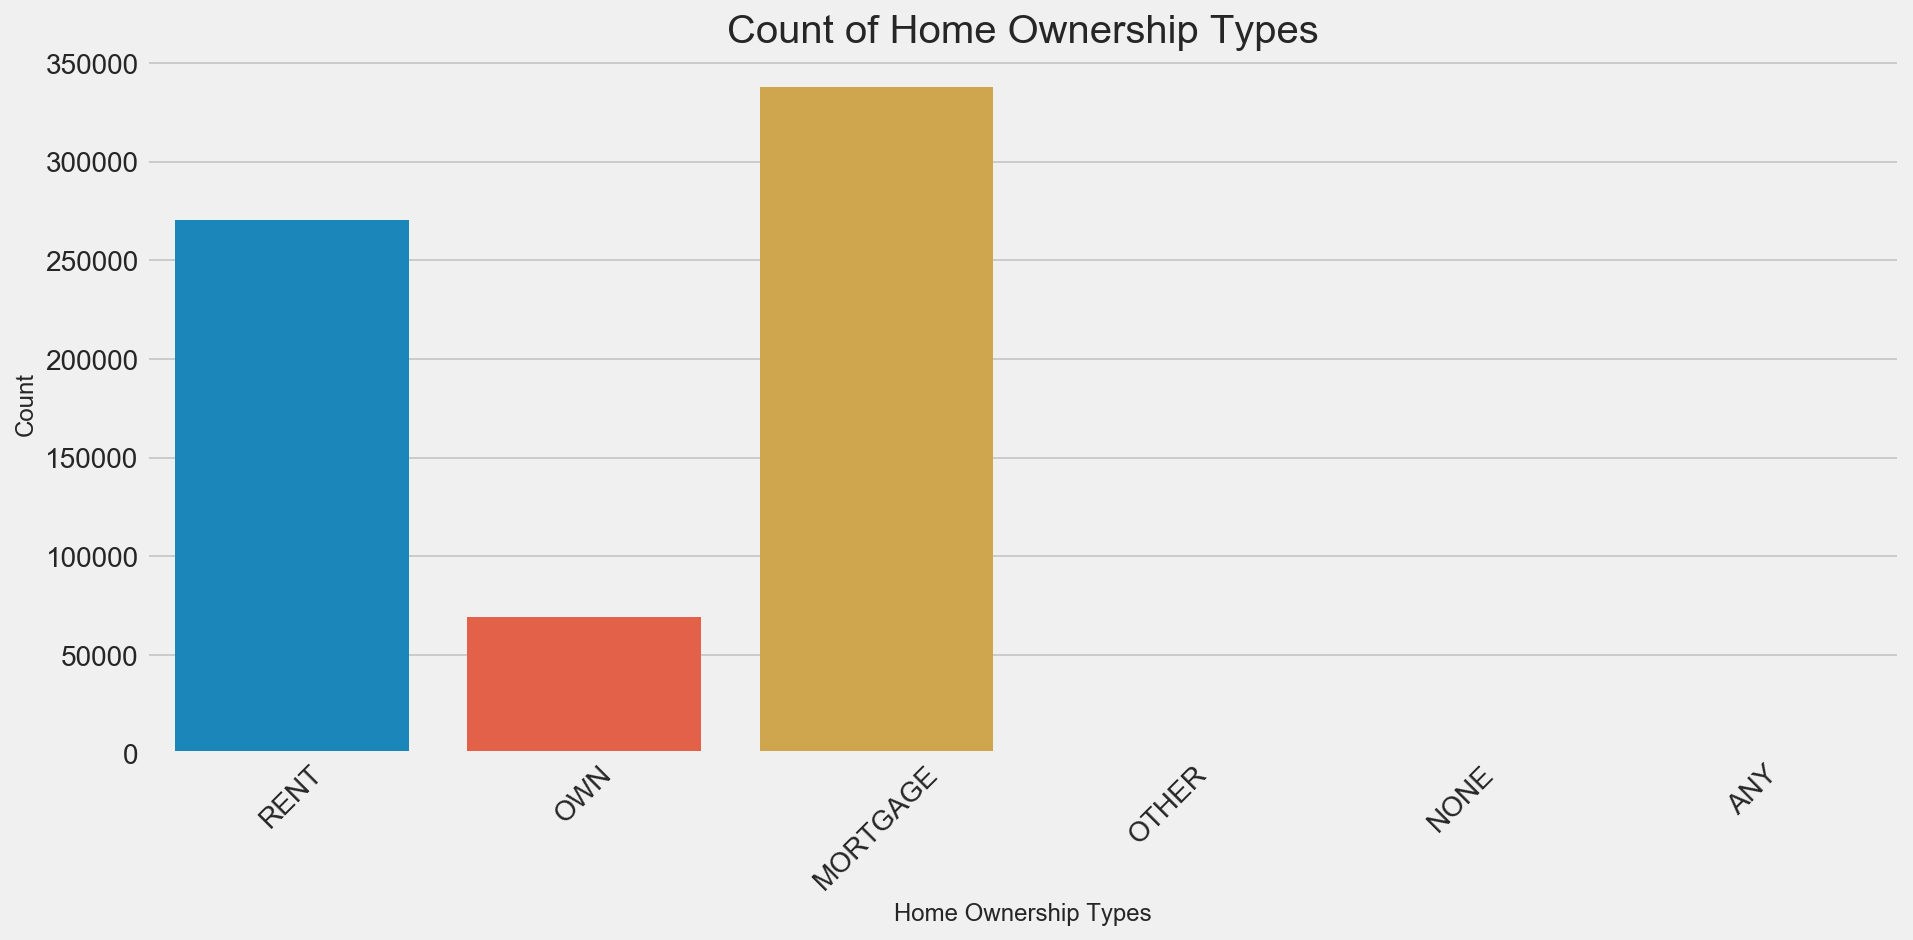

In [50]:
plt.figure(figsize=(14, 6))
# Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(
    x='home_ownership', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_xlabel("Home Ownership Types", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.legend(loc='upper left')
g.set_title("Count of Home Ownership Types", fontsize=20)
plt.show()

No handles with labels found to put in legend.


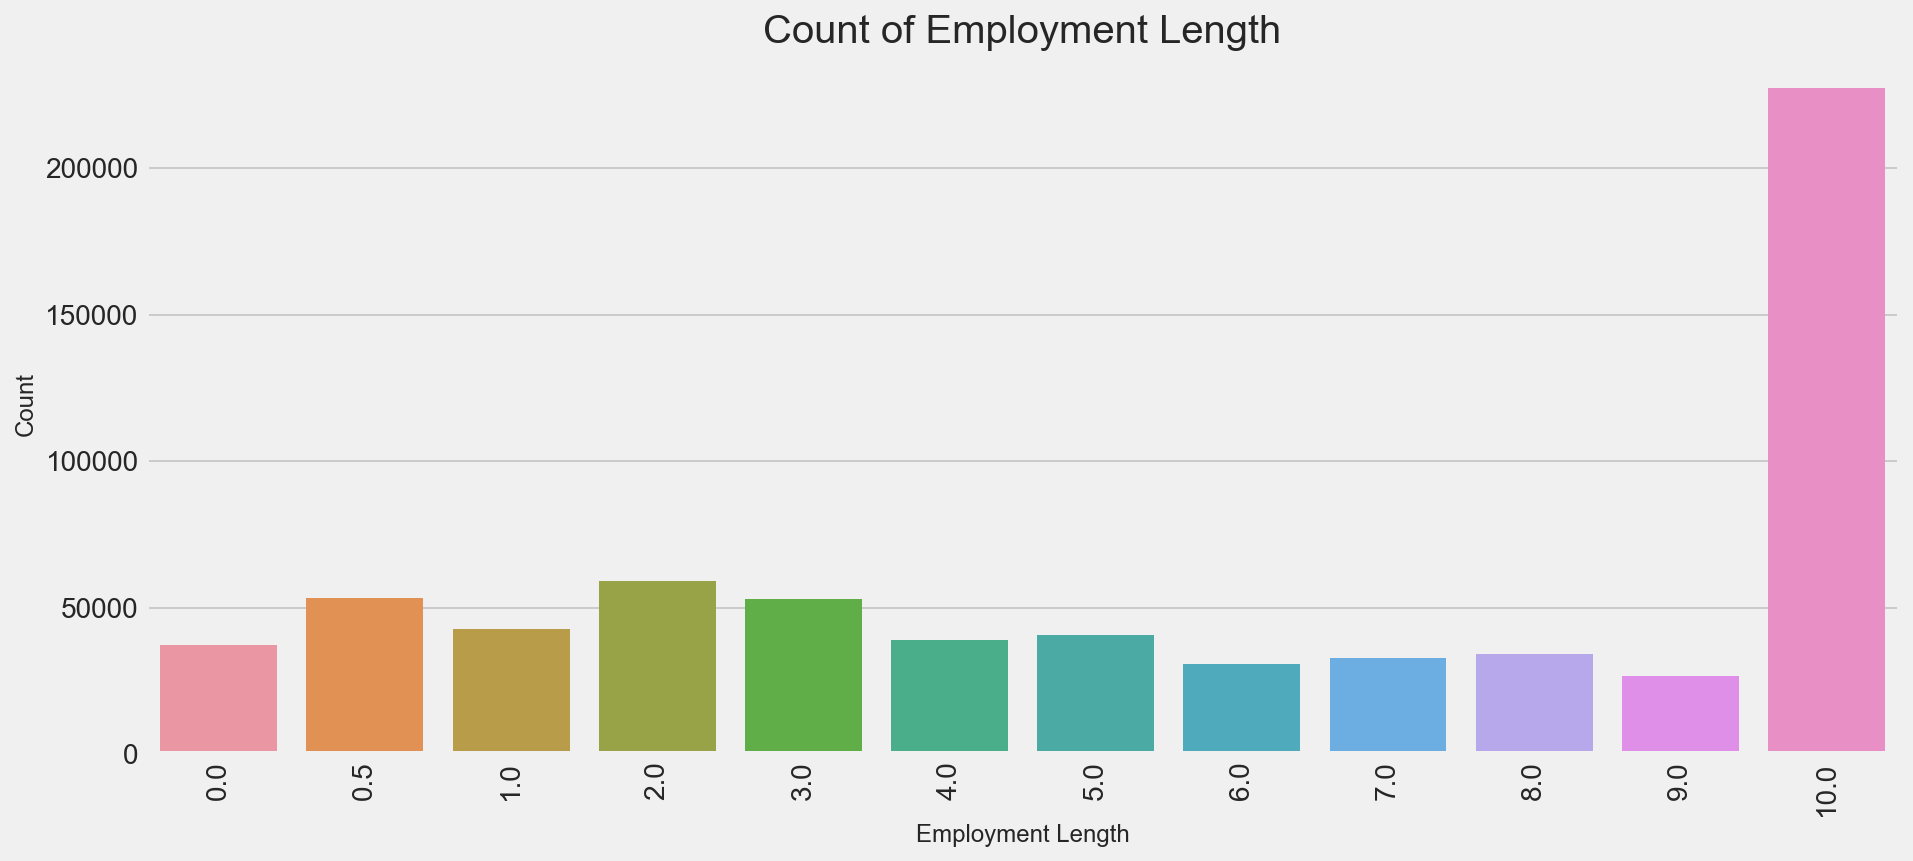

In [51]:
plt.figure(figsize=(14, 6))
# Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(
    x='emp_length', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel("Employment Length", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.legend(loc='upper left')
g.set_title("Count of Employment Length", fontsize=20)
plt.show()

## Merging sub DataFrames

In [52]:
# Create multilabel target
#df_target = pd.get_dummies(df[['loan_status']])
df_target = df[['loan_status_sht']]
df_target.head()

loan_status_sht
0     Charged Off
1         Current
2         Current
3     Charged Off
4     Charged Off

In [53]:
# Merging sub DataFrames
df_2 = pd.concat([df_int64, df_flt64, df_dummy, df_target], axis=1)
#  df_2 = pd.concat([df_dt64,df_int64,df_flt64,df_dummy,df_target],axis=1)
#  df_2 = pd.concat([df_dt64,df_int64,df_flt64,df_dummy,df_target],axis=1)

# do something to y to LabelEncode
le = LabelEncoder()
y = le.fit_transform(df_2['loan_status_sht'])

df_2['loan_status_enc'] = y
df_2.sample(5)

term  sub_grade  Issue_Year  loan_amnt  funded_amnt  funded_amnt_inv  \
464978    60          4        2015    16000.0      16000.0          16000.0   
664278    60          1        2015    33000.0      33000.0          33000.0   
469191    36          2        2015    30000.0      30000.0          30000.0   
3528      36          4        2011     1500.0       1500.0           1500.0   
220450    36          2        2014    10000.0      10000.0          10000.0   

        int_rate  installment  emp_length  annual_inc    dti  delinq_2yrs  \
464978     13.99       372.21         4.0     87000.0  27.34          0.0   
664278     18.54       847.71        10.0    115000.0  29.80          0.0   
469191     18.55      1092.87        10.0     82000.0  19.83          0.0   
3528       11.49        49.46         1.0     55000.0  10.87          0.0   
220450     10.15       323.38        10.0     69400.0  23.74          0.0   

        inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
464978             0.0                     0.0                     0.0   
664278             0.0                     0.0                     0.0   
469191             1.0                    70.0                    58.0   
3528               1.0                    52.0                     0.0   
220450             0.0                     0.0                     0.0   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  out_prncp  \
464978      14.0      0.0    37150.0        95.5       24.0   15049.72   
664278      23.0      0.0    19978.0        27.3       67.0   28582.79   
469191      18.0      1.0    28518.0        67.6       36.0   26755.63   
3528         6.0      0.0      268.0         4.6       13.0       0.00   
220450      10.0      0.0     8193.0        41.4       22.0    5100.34   

        out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
464978       15049.72      1836.18          1836.18           950.28   
664278       28582.79     10104.54         10104.54          4417.21   
469191       26755.63      5433.43          5433.43          3244.37   
3528             0.00      1330.29          1330.29          1071.43   
220450        5100.34      6144.22          6144.22          4899.66   

        total_rec_int  total_rec_late_fee  recoveries  \
464978         885.90                 0.0         0.0   
664278        5687.33                 0.0         0.0   
469191        2189.06                 0.0         0.0   
3528           258.86                 0.0         0.0   
220450        1244.56                 0.0         0.0   

        collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
464978                      0.0           372.21                         0.0   
664278                      0.0           847.71                         0.0   
469191                      0.0          1092.87                         0.0   
3528                        0.0            49.46                         0.0   
220450                      0.0           323.38                         0.0   

        mths_since_last_major_derog  annual_inc_joint  dti_joint  \
464978                          0.0               0.0        0.0   
664278                          0.0               0.0        0.0   
469191                          0.0               0.0        0.0   
3528                            0.0               0.0        0.0   
220450                          0.0               0.0        0.0   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_il_6m  \
464978             0.0           0.0     241705.0          0.0         0.0   
664278             0.0           0.0     389974.0          0.0         0.0   
469191             0.0           0.0     339787.0          0.0         0.0   
3528               0.0           0.0          0.0          0.0         0.0   
220450             0.0           0.0      40351.0          0.0         0.0   

        open_il_12m  open_il_24m  mths_

### Check Classes to Label Encoder

In [54]:
list(le.classes_)
labencclass = pd.DataFrame(list(le.classes_), columns=['classes'])
df_o_labenctbl = pd.concat([df_o_labenctbl, labencclass], axis=1)
#  labencclass
df_o_labenctbl.head(10)

application_type initial_list_status addr_state             purpose  \
0       INDIVIDUAL                   f         AK                 car   
1            JOINT                   w         AL         credit_card   
2              NaN                 NaN         AR  debt_consolidation   
3              NaN                 NaN         AZ         educational   
4              NaN                 NaN         CA    home_improvement   
5              NaN                 NaN         CO               house   
6              NaN                 NaN         CT      major_purchase   
7              NaN                 NaN         DC             medical   
8              NaN                 NaN         DE              moving   
9              NaN                 NaN         FL               other   

  pymnt_plan verification_status home_ownership grade  Dummy      classes  
0          n        Not Verified            ANY     A    0.0  Charged Off  
1          y     Source Verified       MORTGAGE     B    NaN      Current  
2        NaN            Verified           NONE     C    NaN          NaN  
3        NaN                 NaN          OTHER     D    NaN          NaN  
4        NaN                 NaN            OWN     E    NaN          NaN  
5        NaN                 NaN           RENT     F    NaN          NaN  
6        NaN                 NaN            NaN     G    NaN          NaN  
7        NaN                 NaN            NaN   NaN    NaN          NaN  
8        NaN                 NaN            NaN   NaN    NaN          NaN  
9        NaN                 NaN            NaN   NaN    NaN          NaN

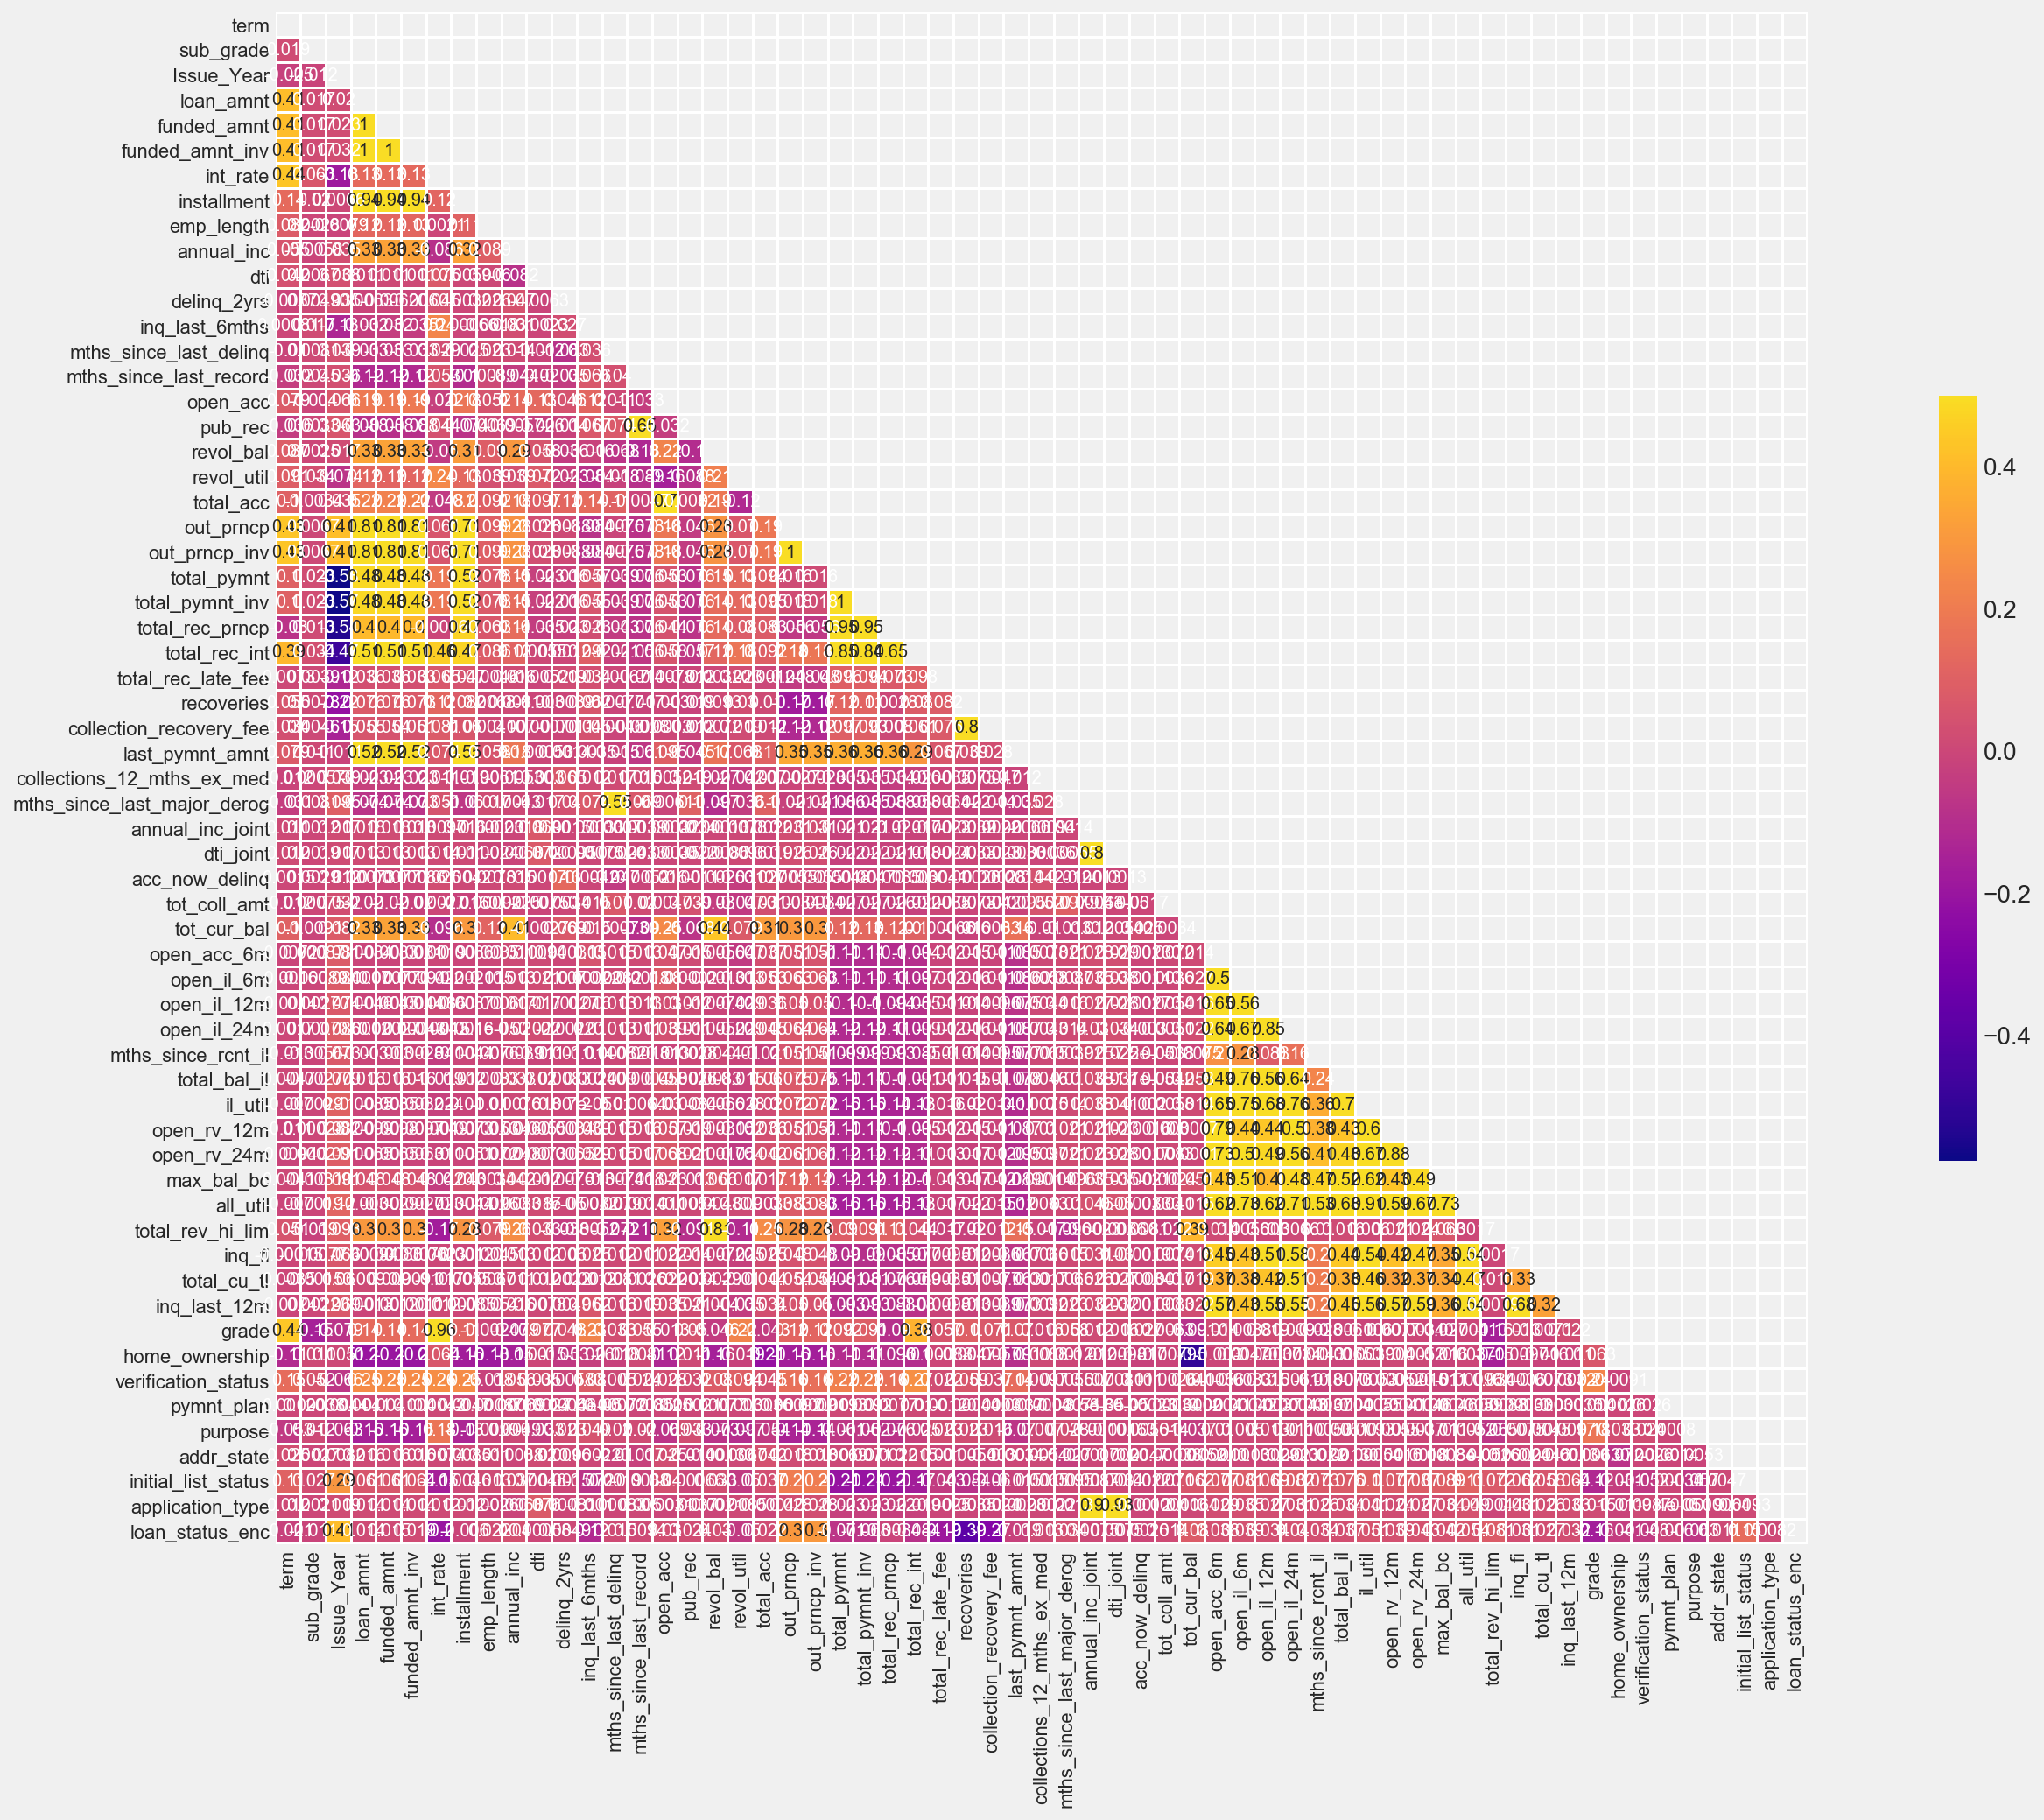

In [91]:
#  see correlation

# Compute the correlation matrix
corr = df_2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(24, 15))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10,s=100,center='light', as_cmap=False)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=1, cbar_kws={"shrink": .5})

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, annot=True, annot_kws={"size": 10}, mask=mask, cmap='plasma', vmax=.5, center=0,
                 square=True, linewidths=1, cbar_kws={"shrink": .5})

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=11)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=11)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## Create X and Y (y is already LabelEncoded)

In [55]:
X = df_2.drop(labels=['loan_status_sht', 'loan_status_enc'], axis=1)
#  y = df_2['loan_status_enc']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(454037, 60)

(223631, 60)

(454037,)

(223631,)

In [56]:
display(y_test.shape, X_train.sample(10))

(223631,)

term  sub_grade  Issue_Year  loan_amnt  funded_amnt  funded_amnt_inv  \
539390    36          1        2015     6000.0       6000.0           6000.0   
392355    36          1        2015    15000.0      15000.0          15000.0   
405465    60          4        2015    33600.0      33600.0          33600.0   
111883    60          2        2014    14150.0      14150.0          14150.0   
144132    36          5        2014    17000.0      17000.0          17000.0   
300804    36          2        2015     4600.0       4600.0           4600.0   
188562    36          3        2014    16000.0      16000.0          16000.0   
629149    36          1        2015    20000.0      20000.0          20000.0   
642026    60          1        2015    14400.0      14400.0          14400.0   
505942    36          2        2015     3000.0       3000.0           3000.0   

        int_rate  installment  emp_length  annual_inc    dti  delinq_2yrs  \
539390      5.32       180.69         0.0     36000.0   0.73          0.0   
392355      8.18       471.30         2.0     62000.0  21.33          0.0   
405465     10.99       730.38         0.0     83000.0  25.94          0.0   
111883     19.24       368.93         7.0     28500.0  39.75          1.0   
144132      8.39       535.79        10.0     90000.0   7.47          1.0   
300804     16.55       162.98         2.0     47000.0  10.70          0.0   
188562     10.99       523.75         5.0     70000.0  26.90          1.0   
629149     12.29       667.06        10.0     55000.0  17.70          0.0   
642026     15.59       347.06         2.0     50000.0  24.27          1.0   
505942      9.17        95.64         7.0     41000.0  15.22          0.0   

        inq_last_6mths  mths_since_last_delinq  mths_since_last_record  \
539390             0.0                    26.0                     0.0   
392355             0.0                     0.0                    74.0   
405465             0.0                     0.0                     0.0   
111883             0.0                    21.0                     0.0   
144132             0.0                     8.0                     0.0   
300804             2.0                     0.0                     0.0   
188562             0.0                     0.0                     0.0   
629149             0.0                     0.0                     0.0   
642026             2.0                     9.0                     0.0   
505942             0.0                    28.0                    80.0   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  out_prncp  \
539390       5.0      0.0      136.0         2.5       16.0    4906.92   
392355      13.0      3.0    10083.0        37.5       40.0   13885.29   
405465      15.0      0.0    71013.0        68.4       37.0   32320.38   
111883      21.0      0.0    12403.0        44.5       34.0       0.00   
144132       8.0      0.0    31326.0        93.0       26.0   10430.47   
300804       8.0      0.0     4636.0        78.6       18.0    4500.46   
188562      17.0      0.0    14749.0        29.0       43.0    9095.26   
629149      11.0      0.0    25472.0        54.3       44.0   15158.78   
642026      16.0      0.0     7999.0        44.0       36.0   12521.33   
505942       8.0      1.0     6155.0        48.5       15.0    2555.29   

        out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
539390        4906.92      1263.06          1263.06          1093.08   
392355       13885.29      1396.86          1396.86          1114.71   
405465       32320.38      2191.13          2191.13          1279.62   
111883           0.00      2939.64          2939.64          1187.61   
144132       10430.47      8021.00          8021.00          6569.53   
300804        4500.46       158.75           158.75            99.54   
188562        9095.26      8903.75          8903.75          6904.74   
629149       15158.78      6643.29          6643.29          4841.22   
6

## Feature Selection

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Feat Sel XGBOOST

Ranking RFeatures:
Selecting Feature Importances
Transforming Data
Creating New Classifier from new Features


C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Shape of Features:
60 10 (454037, 10) (223631, 10) (223631,) (223631,)
----------------------------------------
feature_rank_impt:
['term', 'Issue_Year', 'int_rate', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'all_util']
----------------------------------------
0.9684390804494905
0.9684256654936033
----------------------------------------


C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9684256654936033 
 0.9684256654936033
--------------------------------------------------------------------------------
[[ 15199   6997]
 [    64 201371]]
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.68      0.81     22196
          1       0.97      1.00      0.98    201435

avg / total       0.97      0.97      0.97    223631

Normalized confusion matrix
[[6.84763020e-01 3.15236980e-01]
 [3.17720356e-04 9.99682280e-01]]


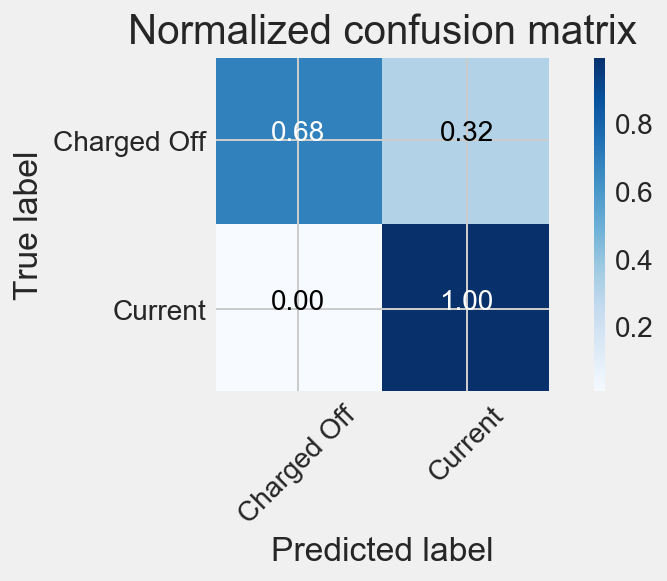

ROC AUC: 0.9212673607325181


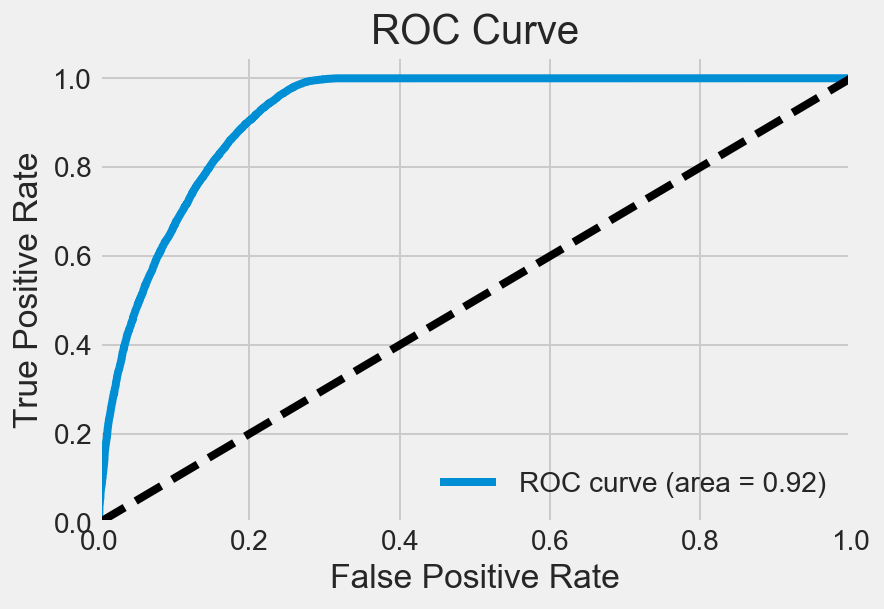

In [95]:
# use random forest classif and feature select
"""
at 0.1: threshold of SelectFromModel
feature_rank_impt:
['int_rate', 'out_prncp', 'last_pymnt_amnt']
at 0.05:
feature_rank_impt:
['Issue_Year', 'int_rate', 'out_prncp', 'total_rec_prncp', 'total_rec_late_fee', 'last_pymnt_amnt']
at 0.025:
feature_rank_impt:
['Issue_Year', 'int_rate', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_late_fee', 'last_pymnt_amnt', 'all_util']
"""
feat_labels = X_train.columns

# choosing Feature Select, do not add max_features here
clf = XGBClassifier(n_jobs=-1)
# Train the classifier
clf.fit(X_train, y_train)
print('Ranking RFeatures:')
# Print the name and gini importance of each feature
feature_rank = []  # not in use
for feature in zip(feat_labels, clf.feature_importances_):
    feature_rank.append(feature)
    #  print(feature)

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 1%
sfm = SelectFromModel(clf, threshold=0.025)
# Train the selector
sfm.fit(X_train, y_train)

print('Selecting Feature Importances')
# Print the names of the most important features
feature_rank_impt = []
for feature_list_index in sfm.get_support(indices=True):
    feature_rank_impt.append(feat_labels[feature_list_index])
    #  print(feat_labels[feature_list_index])

print('Transforming Data')
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

print('Creating New Classifier from new Features')
# Create a new random forest classifier for the most important features
clf_important = XGBClassifier(n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

# Apply The Full Featured Classifier To The Test Data
y_predict = clf.predict(X_test)
# Apply The Full Featured Classifier To The Test Data
y_important_predict = clf_important.predict(X_important_test)

print('Shape of Features:')
print(len(feature_rank), len(feature_rank_impt), X_important_train.shape, X_important_test.shape,
      y_predict.shape, y_important_predict.shape)
print('-'*40)
print('feature_rank_impt:')
print(feature_rank_impt)
print('-'*40)

# View The Accuracy Of Our Full Feature (4 Features) Model
print(accuracy_score(y_test, y_predict))
# View The Accuracy Of Our Limited Feature (2 Features) Model
print(accuracy_score(y_test, y_important_predict))
print('-'*40)

score = clf_important.score(X_important_test, y_test)
acc_score = accuracy_score(y_test, y_important_predict)
classrpt = classification_report(y_test, y_important_predict)
confmatrix = confusion_matrix(y_test, y_important_predict)
#logloss = log_loss(y_test,y_predict)
print(score, '\n', acc_score)
print('-'*80)
print(confmatrix)
print('-'*80)
print(classrpt)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import roc_curve, auc
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_important.predict_proba(X_important_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: {}'.format(roc_auc))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Feat Sel Random Forest

Ranking Features:
Selecting Feature Importances
Transforming Data
Creating New Classifier from new Features
Shape of Features:
60 10 (454037, 10) (223631, 10) (223631,) (223631,)
feature_rank_impt:
['int_rate', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'tot_cur_bal']
----------------------------------------
0.9683854206259418
0.9639405985753317
----------------------------------------
0.9639405985753317 
 0.9639405985753317
--------------------------------------------------------------------------------
[[ 15356   6840]
 [  1224 200211]]
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.93      0.69      0.79     22196
          1       0.97      0.99      0.98    201435

avg / total       0.96      0.96      0.96    223631

Normalized confusion matrix
[[0.69183637 0.30816363]
 [0.00

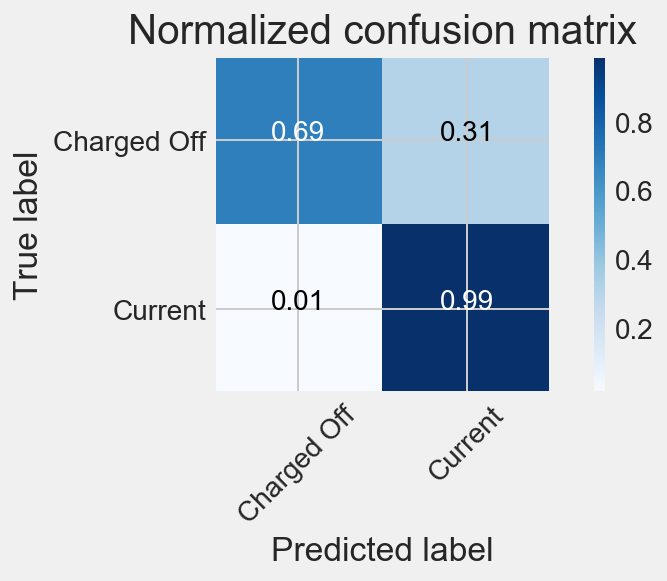

ROC AUC: 0.8801036163919982


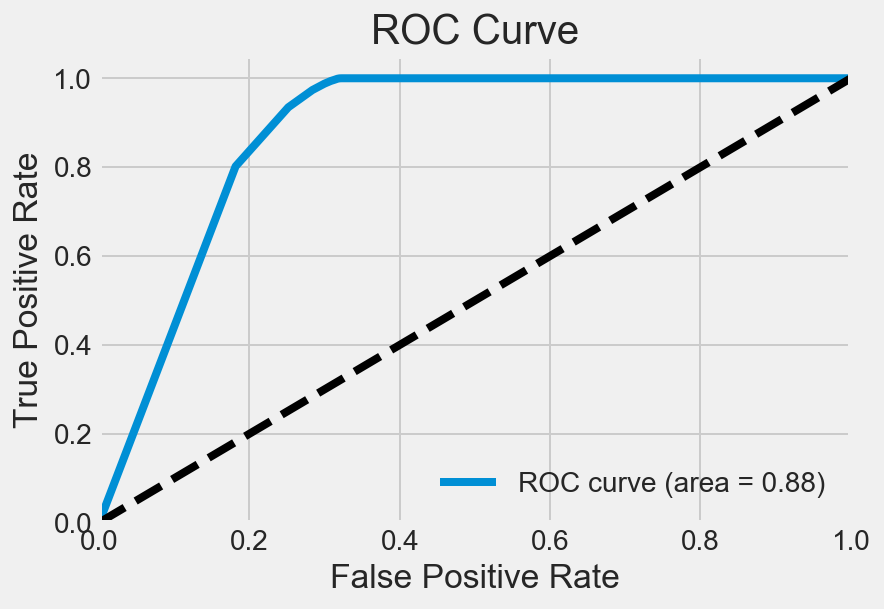

In [96]:
# use random forest classif and feature select
"""
at 0.1: threshold of SelectFromModel
['out_prncp', 'out_prncp_inv', 'collection_recovery_fee']

at 0.025: threshold of SelectFromModel
['out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee', 'total_rev_hi_lim']

at 0.015: threshold of SelectFromModel
['Issue_Year', 'int_rate', 'out_prncp', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp',
'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_amnt', 'tot_cur_bal', 'total_rev_hi_lim']
"""
feat_labels = X_train.columns

# choosing Feature Select, do not add max_features here
clf = RandomForestClassifier(n_jobs=-1)
# Train the classifier
clf.fit(X_train, y_train)
print('Ranking Features:')
# Print the name and gini importance of each feature
feature_rank = []  # not in use
for feature in zip(feat_labels, clf.feature_importances_):
    feature_rank.append(feature)
    #  print(feature)

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 10%
sfm = SelectFromModel(clf, threshold=0.015)
# Train the selector
sfm.fit(X_train, y_train)

print('Selecting Feature Importances')
# Print the names of the most important features
feature_rank_impt = []
for feature_list_index in sfm.get_support(indices=True):
    feature_rank_impt.append(feat_labels[feature_list_index])
    #  print(feat_labels[feature_list_index])


print('Transforming Data')
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

print('Creating New Classifier from new Features')
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_jobs=-1)
# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)
# Apply The Full Featured Classifier To The Test Data
y_predict = clf.predict(X_test)
# Apply The Full Featured Classifier To The Test Data
y_important_predict = clf_important.predict(X_important_test)

print('Shape of Features:')
print(len(feature_rank), len(feature_rank_impt), X_important_train.shape, X_important_test.shape,
      y_predict.shape, y_important_predict.shape)
print('feature_rank_impt:')
print(feature_rank_impt)
print('-'*40)

# View The Accuracy Of Our Full Feature (4 Features) Model
print(accuracy_score(y_test, y_predict))
# View The Accuracy Of Our Limited Feature (2 Features) Model
print(accuracy_score(y_test, y_important_predict))
print('-'*40)

score = clf_important.score(X_important_test, y_test)
acc_score = accuracy_score(y_test, y_important_predict)
classrpt = classification_report(y_test, y_important_predict)
confmatrix = confusion_matrix(y_test, y_important_predict)
#logloss = log_loss(y_test,y_predict)
print(score, '\n', acc_score)
print('-'*80)
print(confmatrix)
print('-'*80)
print(classrpt)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

from sklearn.metrics import roc_curve, auc
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_important.predict_proba(X_important_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: {}'.format(roc_auc))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Feat Select with RFE

In [199]:
# Feature Select with RFE  - 15mins
"""
X_f_col: ['term' 'funded_amnt' 'int_rate' 'emp_length' 'out_prncp'
 'total_rec_prncp' 'total_rec_late_fee' 'all_util' 'grade'
 'home_ownership']
"""
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X_train, y_train)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))
print('-'*40)
X_rfe_red = fit.transform(X_train)
X_rfe_gsupport = fit.get_support(True)
X_rfe_col = np.array(X_train.columns[fit.get_support(True)])

# Show results
print('Original number of features:', X_train.shape[1])
print('Reduced number of features:', X_rfe_red.shape[1])
print('-'*40)
print('X_rfe_col:', X_rfe_col)
print('-'*40)
print('F_classif_getsupport:', X_rfe_gsupport)

Num Features: 10
Selected Features: [ True False False False  True False  True False  True False False False
 False False False False False False False False  True False False False
  True False  True False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False  True  True False False False False False False]
Feature Ranking: [ 1 46 13 38  1 26  1  7  1 43 19 10  8 20 25 34 27 41 15 14  1 12  2 32
  1  3  1  6 18 29 50 23 30 49 40 44 45 33 22 39 28  4 36  9 21 16 31  1
 37 35 47 24  1  1 11 48 17 42  5 51]


In [58]:
"""
Num Features: 10
Selected Features: [ True False False False  True False  True False  True False False False
 False False False False False False False False  True False False False
  True False  True False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False  True  True False False False False False False]

Feature Ranking: [ 1 46 13 38  1 26  1  7  1 43 19 10  8 20 25 34 27 41 15 14  1 12  2 32
  1  3  1  6 18 29 50 23 30 49 40 44 45 33 22 39 28  4 36  9 21 16 31  1
 37 35 47 24  1  1 11 48 17 42  5 51]
 
Original number of features: 60
Reduced number of features: 10
----------------------------------------
X_f_col: ['term' 'funded_amnt' 'int_rate' 'emp_length' 'out_prncp'
 'total_rec_prncp' 'total_rec_late_fee' 'all_util' 'grade'
 'home_ownership']
----------------------------------------
F_classif_getsupport: [ 0  4  6  8 20 24 26 47 52 53]
"""
X_rfe_col = ['term', 'funded_amnt', 'int_rate', 'emp_length', 'out_prncp',
             'total_rec_prncp', 'total_rec_late_fee', 'all_util', 'grade', 'home_ownership']

### Feat Select F Classif and Chi2

In [97]:
# f-test
# select k predictors from f-test
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_train, y_train)
X_f_red = selector.transform(X_train)

# print variable, F-test value & p-value
list(zip(X_train.columns.values, selector.scores_, selector.pvalues_))

X_f_gsupport = selector.get_support(True)
# select chosen column, true gives column index
X_f_col = np.array(X_train.columns[selector.get_support(True)])

# Show results
print('Original number of features:', X_train.shape[1])
print('Reduced number of features:', X_f_red.shape[1])
print('-'*40)
print('X_f_col:', X_f_col)
print('-'*40)
print('F_classif_getsupport:', X_f_gsupport)

Original number of features: 60
Reduced number of features: 10
----------------------------------------
X_f_col: ['Issue_Year' 'int_rate' 'inq_last_6mths' 'out_prncp' 'out_prncp_inv'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee' 'grade'
 'initial_list_status']
----------------------------------------
F_classif_getsupport: [ 2  6 12 20 21 26 27 28 52 58]


In [98]:
"""# chi2
# select k predictors from f-test
selector_chi = SelectKBest(score_func=chi2, k=15)

selector_chi.fit(X_train, y_train)
X_c_red = selector_chi.transform(X_train)

# print variable, F-test value & p-value
list(zip(X_train.columns.values, selector_chi.scores_, selector_chi.pvalues_))

X_c_gsupport = selector_chi.get_support(True)
# select chosen column, true gives column index
X_c_col = np.array(X_train.columns[selector_chi.get_support(True)])

# Show results
print('Original number of features:', X_train.shape[1])
print('Reduced number of features:', X_c_red.shape[1])
print('-'*40)
print('X_c_col:', X_c_col)
print('-'*40)
print('Chi2_getsupport:', X_c_gsupport)"""

"# chi2\n# select k predictors from f-test\nselector_chi = SelectKBest(score_func=chi2, k=15)\n\nselector_chi.fit(X_train, y_train)\nX_c_red = selector_chi.transform(X_train)\n\n# print variable, F-test value & p-value\nlist(zip(X_train.columns.values, selector_chi.scores_, selector_chi.pvalues_))\n\nX_c_gsupport = selector_chi.get_support(True)\n# select chosen column, true gives column index\nX_c_col = np.array(X_train.columns[selector_chi.get_support(True)])\n\n# Show results\nprint('Original number of features:', X_train.shape[1])\nprint('Reduced number of features:', X_c_red.shape[1])\nprint('-'*40)\nprint('X_c_col:', X_c_col)\nprint('-'*40)\nprint('Chi2_getsupport:', X_c_gsupport)"

In [59]:
X = df_2[X_rfe_col]
display(X.head(5), X.shape)

term  funded_amnt  int_rate  emp_length  out_prncp  total_rec_prncp  \
0    60       2500.0     15.27         0.5       0.00           456.46   
1    60       3000.0     12.69         1.0     766.90          2233.10   
2    60       7000.0     15.96         8.0    1889.15          5110.85   
3    60       5600.0     21.28         4.0       0.00           162.02   
4    60       5375.0     12.69         0.5       0.00           673.48   

   total_rec_late_fee  all_util  grade  home_ownership  
0                 0.0       0.0      2               5  
1                 0.0       0.0      1               5  
2                 0.0       0.0      2               5  
3                 0.0       0.0      5               4  
4                 0.0       0.0      1               5

(677668, 10)

In [101]:
df_hm = X.copy()
df_hm['loan_status_enc'] = y
df_hm['loan_status_sht'] = df_2['loan_status_sht']
df_hm.head()

term  funded_amnt  int_rate  emp_length  out_prncp  total_rec_prncp  \
0    60       2500.0     15.27         0.5       0.00           456.46   
1    60       3000.0     12.69         1.0     766.90          2233.10   
2    60       7000.0     15.96         8.0    1889.15          5110.85   
3    60       5600.0     21.28         4.0       0.00           162.02   
4    60       5375.0     12.69         0.5       0.00           673.48   

   total_rec_late_fee  all_util  grade  home_ownership  loan_status_enc  \
0                 0.0       0.0      2               5                0   
1                 0.0       0.0      1               5                1   
2                 0.0       0.0      2               5                1   
3                 0.0       0.0      5               4                0   
4                 0.0       0.0      1               5                0   

  loan_status_sht  
0     Charged Off  
1         Current  
2         Current  
3     Charged Off  
4     Charged Off

### Export CSV

In [206]:
df_hm.to_csv('./df_hm.csv', index=False)
df_o_labenctbl.to_csv('./df_o_labenctbl.csv', index=False)

## MOVE ON TO 04_rcf.ipynb

### Show new correlation Heatmap

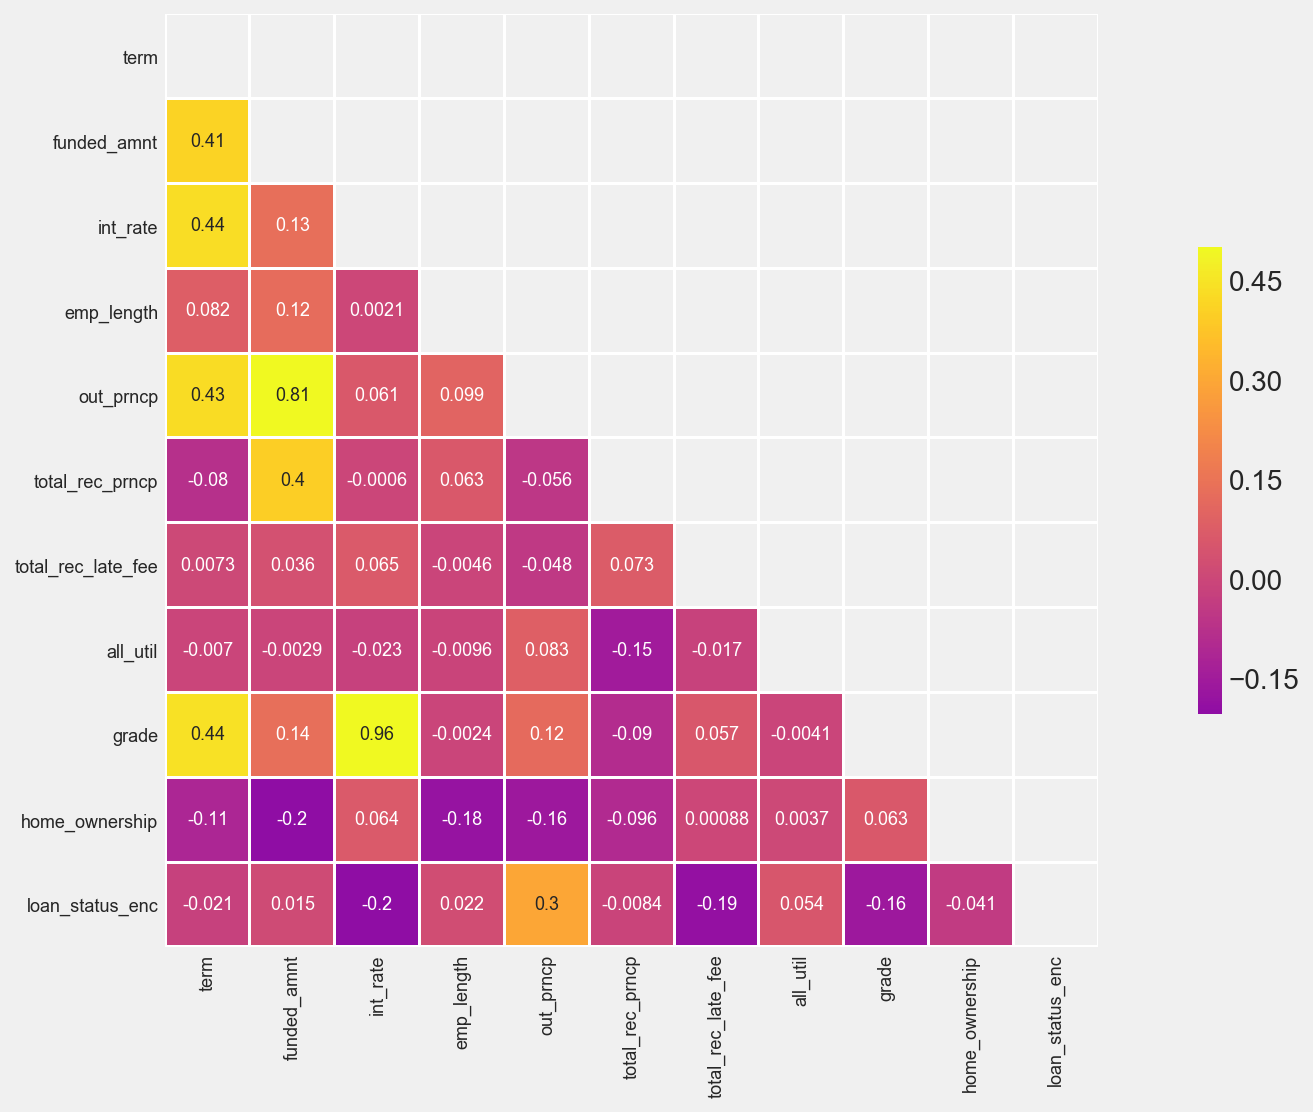

In [102]:
# Check Distributions
#  see correlation

# Compute the correlation matrix
corr = df_hm.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 8))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10,s=100,center='light', as_cmap=False)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=1, cbar_kws={"shrink": .5})

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, annot=True, annot_kws={"size": 9}, mask=mask, cmap='plasma', vmax=.5, center=0,
                 square=True, linewidths=1, cbar_kws={"shrink": .5})

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=9)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=9)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

### Reset the X and Y

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(474367, 10)

(203301, 10)

(474367,)

(203301,)



## Test Basic Models

### Basic LogReg

0.9680473780256861 
 0.9680473780256861
--------------------------------------------------------------------------------
[[ 13946   6349]
 [   147 182859]]
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.99      0.69      0.81     20295
          1       0.97      1.00      0.98    183006

avg / total       0.97      0.97      0.97    203301

Normalized confusion matrix
[[6.87164326e-01 3.12835674e-01]
 [8.03252352e-04 9.99196748e-01]]


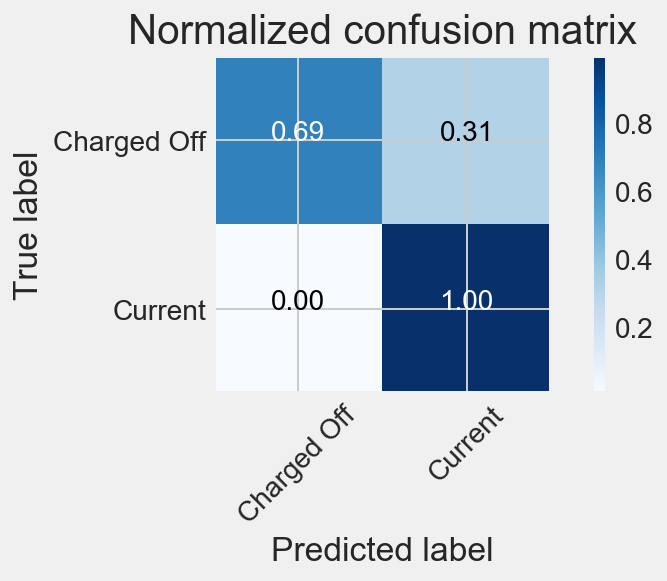

ROC AUC: 0.870803320094107


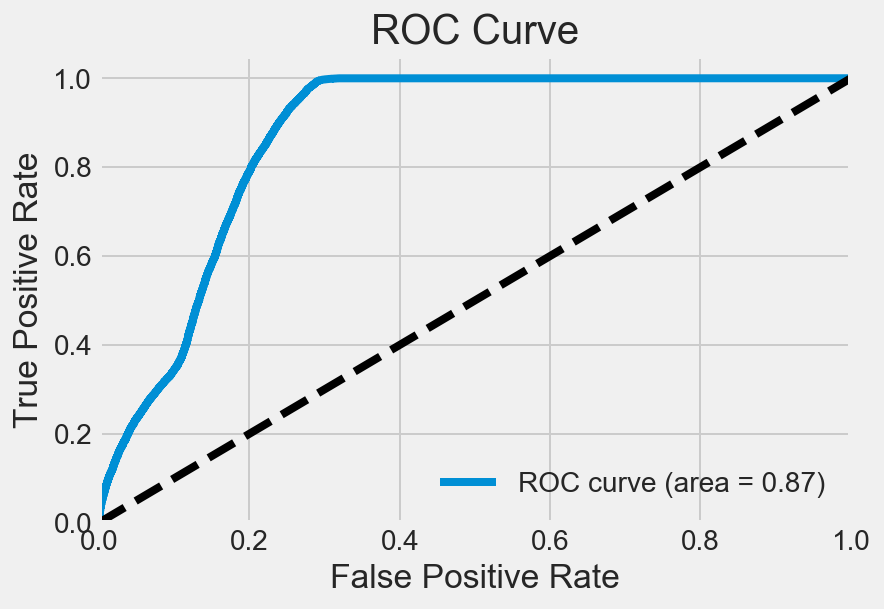

In [104]:
#  Logistic Regression CV Basic -
logregCV = LogisticRegressionCV(cv=3, n_jobs=-1)
logregCV.fit(X_train, y_train)
y_predict = logregCV.predict(X_test)
score = logregCV.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_predict)
classrpt = classification_report(y_test, y_predict)
confmatrix = confusion_matrix(y_test, y_predict)
#logloss = log_loss(y_test,y_predict)
print(score, '\n', acc_score)
print('-'*80)
print(confmatrix)
print('-'*80)
print(classrpt)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

from sklearn.metrics import roc_curve, auc
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, logregCV.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: {}'.format(roc_auc))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Log Reg

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.9680227839508906 
 0.9680227839508906
--------------------------------------------------------------------------------
[[ 14008   6287]
 [   214 182792]]
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.98      0.69      0.81     20295
          1       0.97      1.00      0.98    183006

avg / total       0.97      0.97      0.97    203301

Normalized confusion matrix
[[0.69021927 0.30978073]
 [0.00116936 0.99883064]]


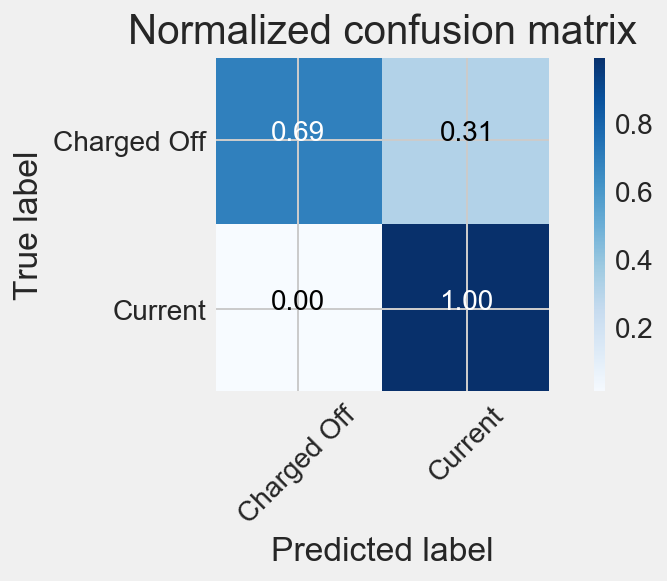

ROC AUC: 0.8692742404656288


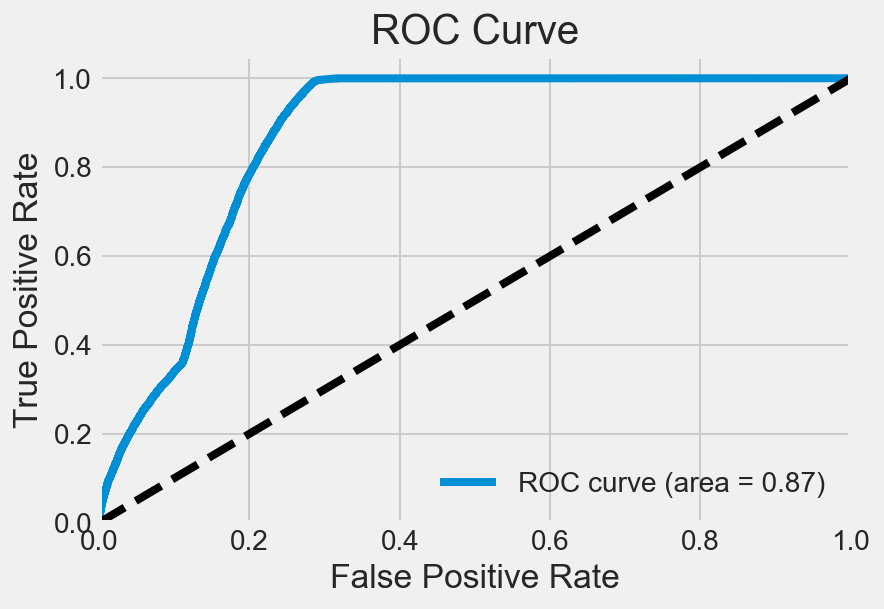

In [106]:
# Logistic Regression with multinomial saga - 5mins
# multi_class='ovr' is for binary
logreg = LogisticRegression(n_jobs=-1)
logreg.fit(X_train, y_train)

y_predict = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_predict)
classrpt = classification_report(y_test, y_predict)
confmatrix = confusion_matrix(y_test, y_predict)
#logloss = log_loss(y_test,y_predict)
print(score, '\n', acc_score)
print('-'*80)
print(confmatrix)
print('-'*80)
print(classrpt)
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: {}'.format(roc_auc))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### DecisionTree

0.9454995302531715 
 0.9454995302531715
--------------------------------------------------------------------------------
[[ 14832   5463]
 [  5617 177389]]
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.73      0.73      0.73     20295
          1       0.97      0.97      0.97    183006

avg / total       0.95      0.95      0.95    203301

--------------------------------------------------------------------------------
Normalized confusion matrix
[[0.7308204  0.2691796 ]
 [0.03069298 0.96930702]]


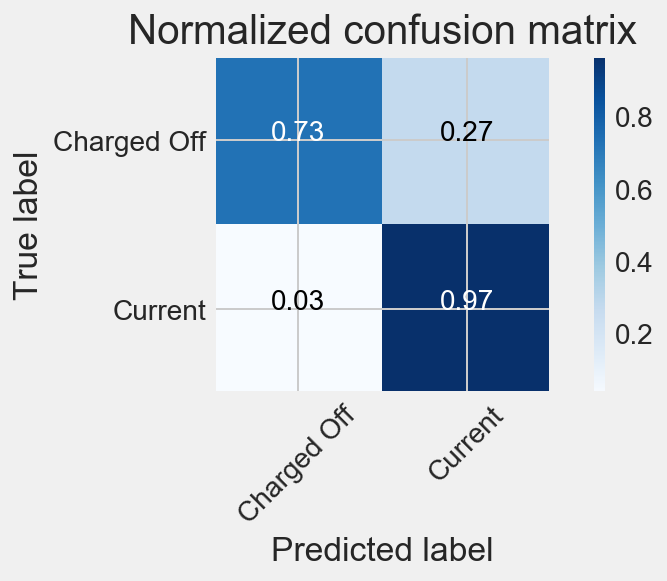

ROC AUC: 0.8513680858722324


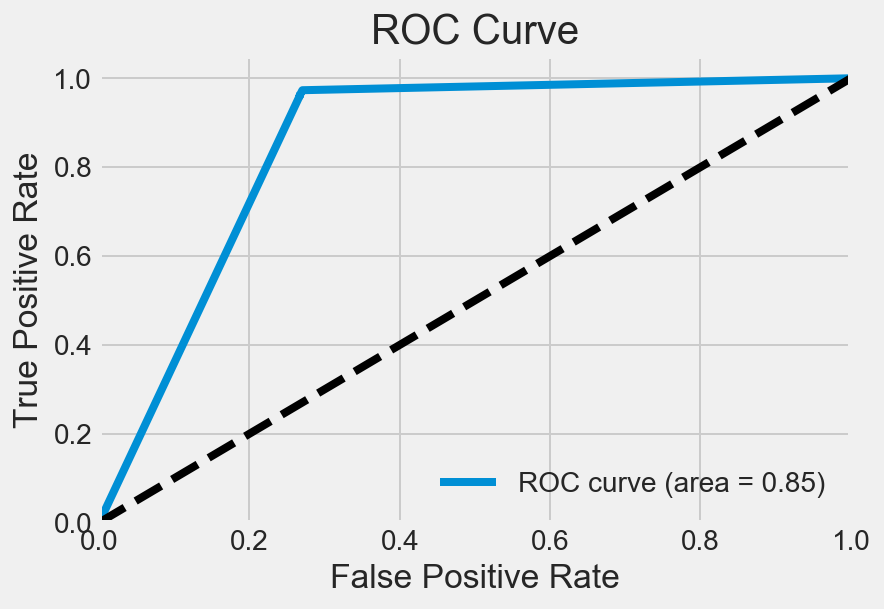

In [107]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_predict = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_predict)
classrpt = classification_report(y_test, y_predict)
confmatrix = confusion_matrix(y_test, y_predict)
#logloss = log_loss(y_test,y_predict)
print(score, '\n', acc_score)
print('-'*80)
print(confmatrix)
print('-'*80)
print(classrpt)
print('-'*80)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: {}'.format(roc_auc))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#  Make graph of Dec Tree
"""
import pydotplus
from sklearn import tree
import collections
from sklearn.externals.six import StringIO
#y_train.values
# Create DOT data
dot_data = tree.export_graphviz(dtree, out_file=None,
                                feature_names=X_f_col,
                                class_names=y_train.values)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())"""

### SGD Classifier

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9328483381783661 
 0.9328483381783661
--------------------------------------------------------------------------------
[[ 14102   6193]
 [  7459 175547]]
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.65      0.69      0.67     20295
          1       0.97      0.96      0.96    183006

avg / total       0.93      0.93      0.93    203301

Normalized confusion matrix
[[0.69485095 0.30514905]
 [0.04075823 0.95924177]]


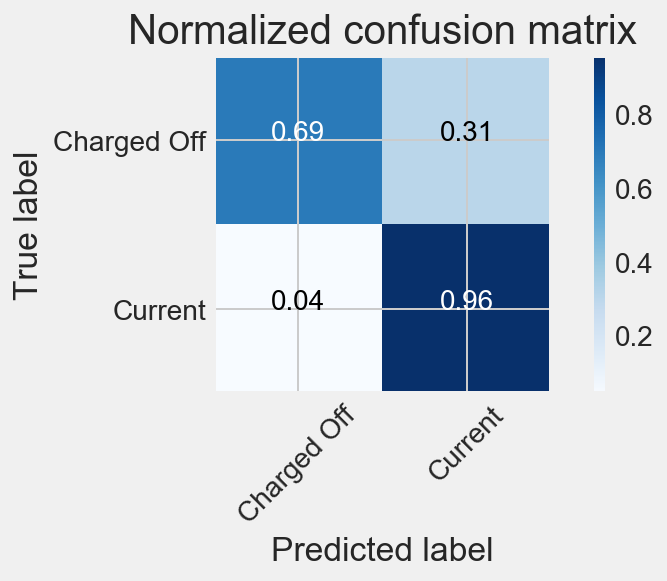

ROC AUC: 0.8270843885836916


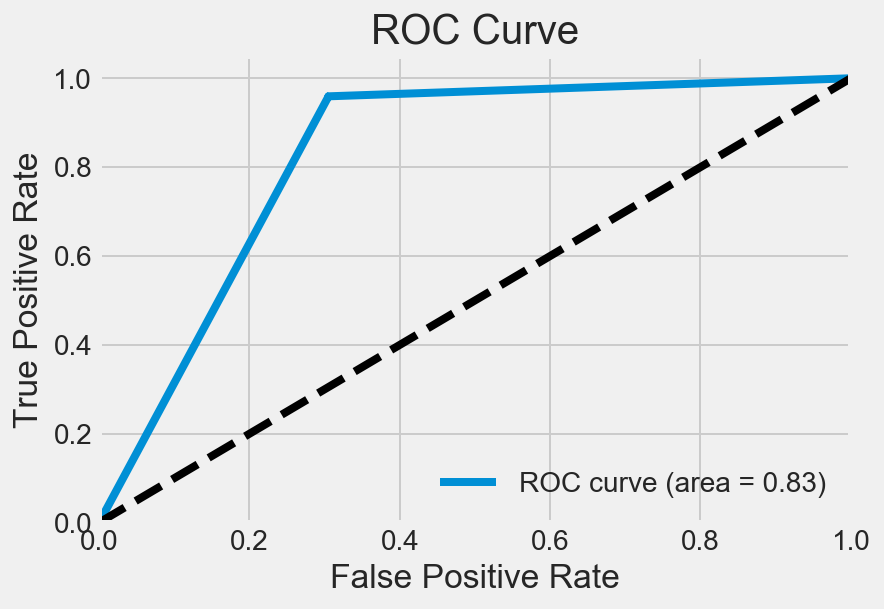

In [110]:
#  SGD Classifier - 2 mins
SGDC = SGDClassifier(loss='log', alpha=0.0001, power_t=0.5, n_jobs=-1)
SGDC.fit(X_train, y_train)

y_predict = SGDC.predict(X_test)
score = SGDC.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_predict)
classrpt = classification_report(y_test, y_predict)
confmatrix = confusion_matrix(y_test, y_predict)
#logloss = log_loss(y_test,y_predict)
print(score, '\n', acc_score)
print('-'*80)
print(confmatrix)
print('-'*80)
print(classrpt)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, SGDC.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: {}'.format(roc_auc))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Kernal Approximation

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9664094126443057 
 0.9664094126443057
--------------------------------------------------------------------------------
[[ 13975   6438]
 [   391 182497]]
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

          0       0.97      0.68      0.80     20413
          1       0.97      1.00      0.98    182888

avg / total       0.97      0.97      0.96    203301

Normalized confusion matrix
[[0.68461275 0.31538725]
 [0.00213792 0.99786208]]


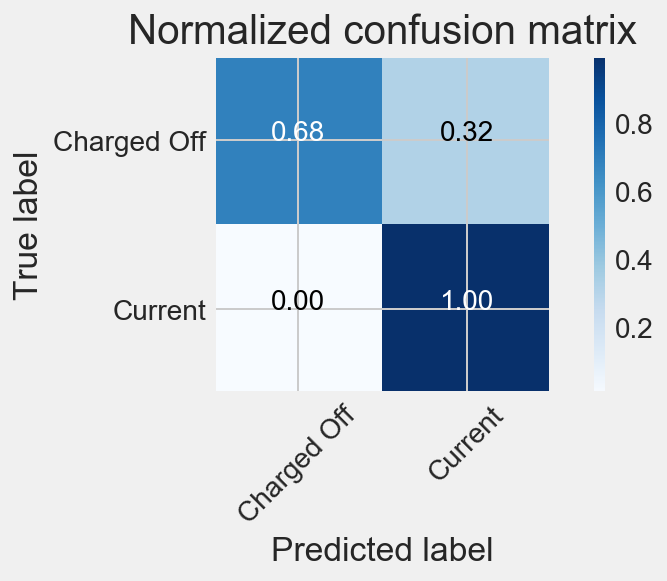

In [216]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.kernel_approximation import AdditiveChi2Sampler
rbf_feature = AdditiveChi2Sampler()
X_train_feat = rbf_feature.fit_transform(X_train)
X_test_feat = rbf_feature.fit_transform(X_test)

SGDC = SGDClassifier(loss='log', alpha=0.0001, power_t=0.5, n_jobs=-1)
SGDC.fit(X_train_feat, y_train)

y_predict = SGDC.predict(X_test_feat)
score = SGDC.score(X_test_feat, y_test)
acc_score = accuracy_score(y_test, y_predict)
classrpt = classification_report(y_test, y_predict)
confmatrix = confusion_matrix(y_test, y_predict)
#logloss = log_loss(y_test,y_predict)
print(score, '\n', acc_score)
print('-'*80)
print(confmatrix)
print('-'*80)
print(classrpt)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### XGBOOST - check scale_pos_weight

C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\brian\AppData\Local\Continuum\anaconda3\envs\tensorflowanaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9681654295847044 
 0.9681654295847044
--------------------------------------------------------------------------------
[[ 13888   6407]
 [    65 182941]]
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.68      0.81     20295
          1       0.97      1.00      0.98    183006

avg / total       0.97      0.97      0.97    203301

Normalized confusion matrix
[[6.84306479e-01 3.15693521e-01]
 [3.55179612e-04 9.99644820e-01]]


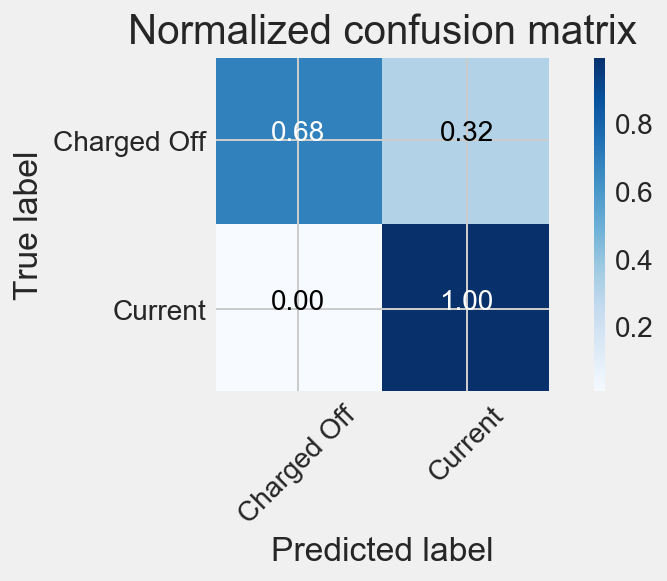

In [108]:
#  XGB 50 secs
from xgboost import XGBClassifier
XGBc = XGBClassifier(learning_rate=0.1, n_jobs=-1,scale_pos_weight=1)
XGBc.fit(X_train, y_train)

# make predictions for test data
y_predict = XGBc.predict(X_test)
predictions = [round(value) for value in y_predict]

score = XGBc.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_predict)
classrpt = classification_report(y_test, y_predict)
confmatrix = confusion_matrix(y_test, y_predict)
#logloss = log_loss(y_test,y_predict)
print(score, '\n', acc_score)
print('-'*80)
print(confmatrix)
print('-'*80)
print(classrpt)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

ROC AUC: 0.916503651428416


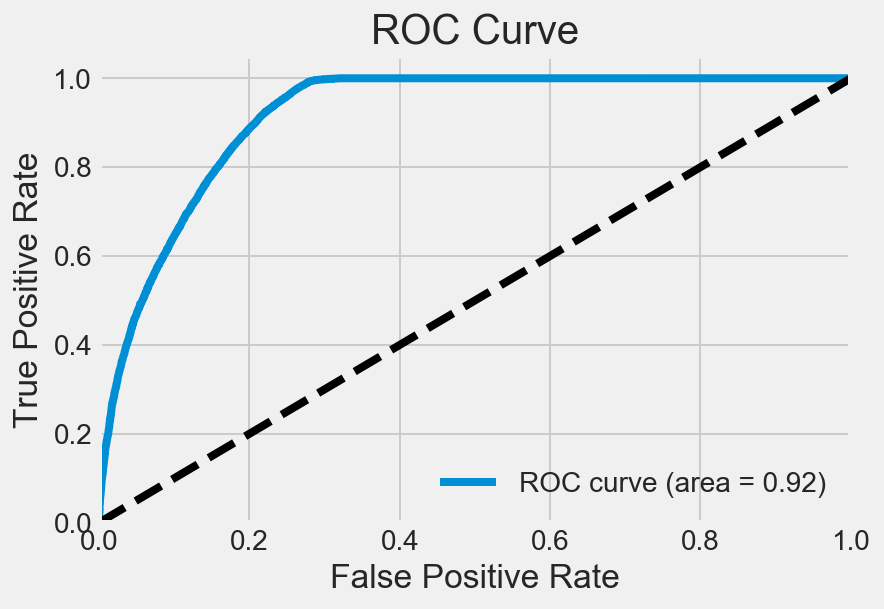

In [109]:
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, XGBc.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: {}'.format(roc_auc))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Random Forest Classifier

0.9680031086910541 
 0.9680031086910541
--------------------------------------------------------------------------------
[[ 13809   6486]
 [    19 182987]]
--------------------------------------------------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.68      0.81     20295
          1       0.97      1.00      0.98    183006

avg / total       0.97      0.97      0.97    203301

--------------------------------------------------------------------------------
Normalized confusion matrix
[[6.80413895e-01 3.19586105e-01]
 [1.03821733e-04 9.99896178e-01]]


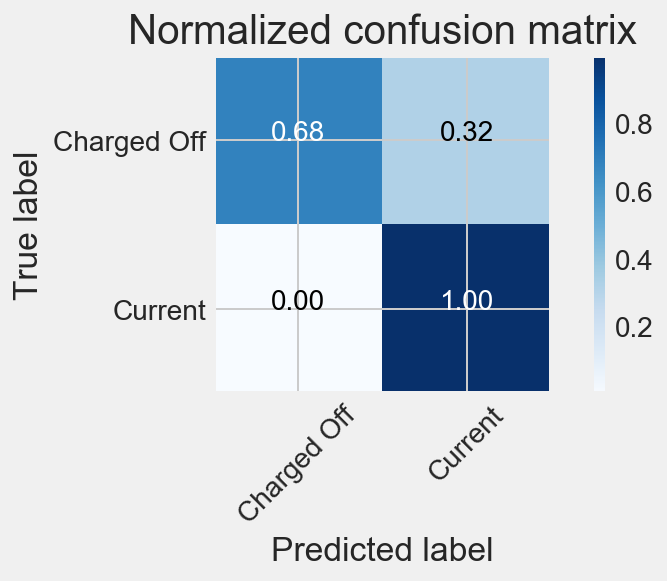

ROC AUC: 0.910499125069579


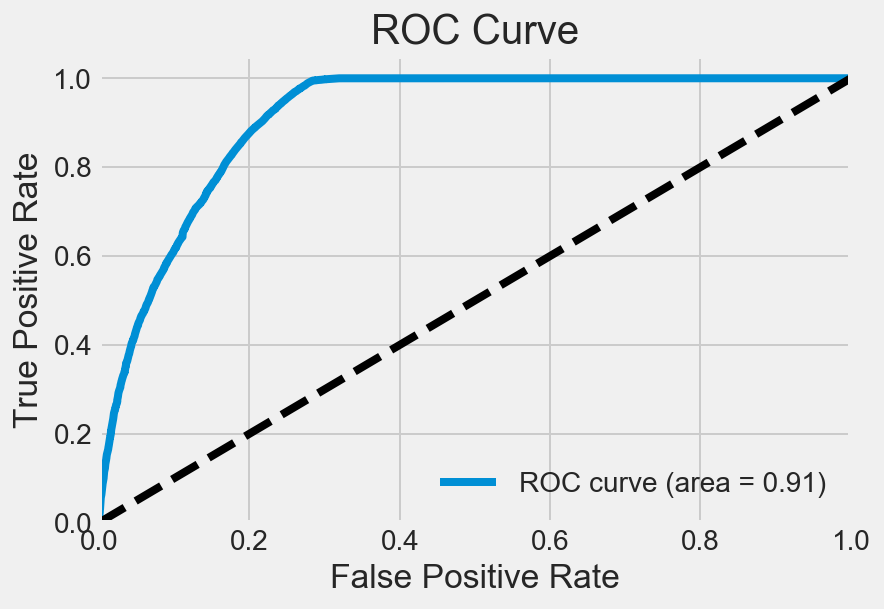

In [111]:
#  RandomForestClassifier - 30sec
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=3)
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)
score = rfc.score(X_test, y_test)
acc_score = accuracy_score(y_test, y_predict)
classrpt = classification_report(y_test, y_predict)
confmatrix = confusion_matrix(y_test, y_predict)
#logloss = log_loss(y_test,y_predict)
print(score, '\n', acc_score)
print('-'*80)
print(confmatrix)
print('-'*80)
print(classrpt)
print('-'*80)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                      title='Normalized confusion matrix')
plt.show()


# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print ('ROC AUC: {}'.format(roc_auc))

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### SMOTE + RFC

Fold: 1
Train accuracy:  0.8692155142155142
----------------------------------------
Test accuracy:  0.9672912858976872
----------------------------------------
Confusion Matrix:
 [[ 11246   4426]
 [   746 141705]]
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

          0       0.94      0.72      0.81     15672
          1       0.97      0.99      0.98    142451

avg / total       0.97      0.97      0.97    158123

--------------------------------------------------------------------------------
Normalized confusion matrix
[[0.73188654 0.26811346]
 [0.0309479  0.9690521 ]]


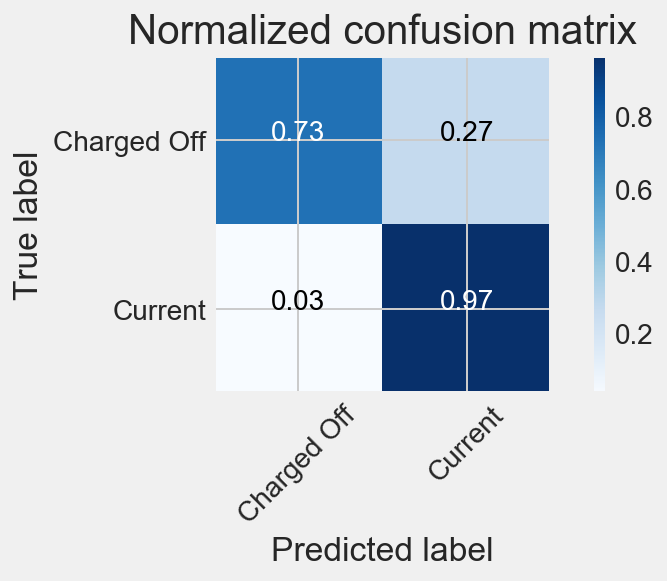

Fold: 2
Train accuracy:  0.8818080666617527
----------------------------------------
Test accuracy:  0.9676199390344165
----------------------------------------
Confusion Matrix:
 [[ 11210   4462]
 [   658 141792]]
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

          0       0.94      0.72      0.81     15672
          1       0.97      1.00      0.98    142450

avg / total       0.97      0.97      0.97    158122

--------------------------------------------------------------------------------
Normalized confusion matrix
[[0.73188654 0.26811346]
 [0.0309479  0.9690521 ]]


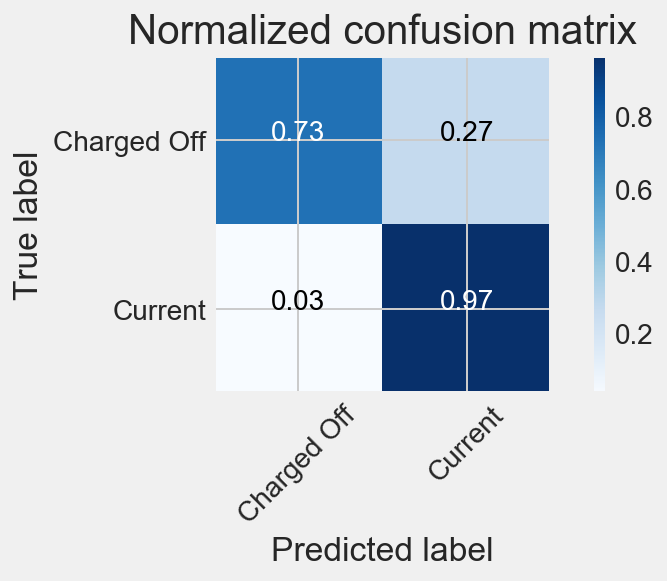

Fold: 3
Train accuracy:  0.8809446088290318
----------------------------------------
Test accuracy:  0.9668547071248783
----------------------------------------
Confusion Matrix:
 [[ 11146   4526]
 [   715 141735]]
----------------------------------------
Classification Report:
              precision    recall  f1-score   support

          0       0.94      0.71      0.81     15672
          1       0.97      0.99      0.98    142450

avg / total       0.97      0.97      0.96    158122

--------------------------------------------------------------------------------
Normalized confusion matrix
[[0.73188654 0.26811346]
 [0.0309479  0.9690521 ]]


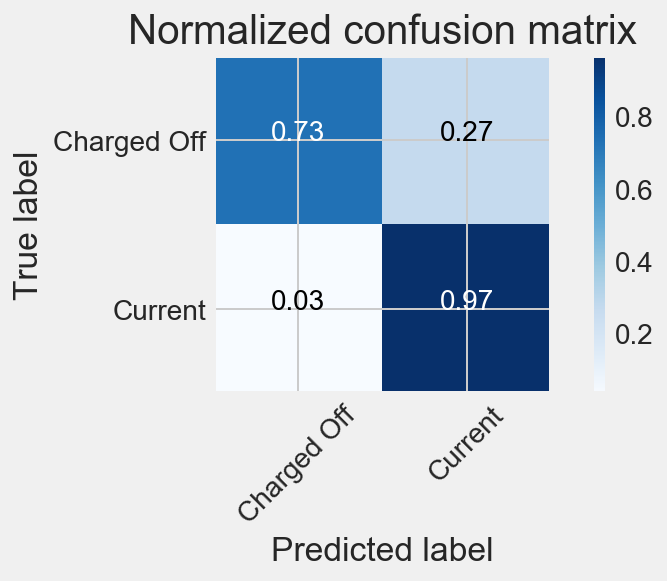

In [212]:
#  2 mins for TTS - CV - SMOTE
from imblearn.pipeline import make_pipeline, Pipeline

# Cross-validate with folds
skf = StratifiedKFold(n_splits=3)
count = 0
for train_index, test_index in skf.split(X_train, y_train):
    count += 1
    print('Fold:', count)
    #print("TRAIN:", train_index, "TEST:", test_index)
    # print(train_index.shape,test_index.shape)
    train_fold_X = X_train.values[train_index]
    train_fold_y = y_train[train_index]
    test_fold_X = X_train.values[test_index]
    test_fold_y = y_train[test_index]

    # Scale each train-fold
    #scaler = StandardScaler().fit(train_fold_X)
    ssX_train = train_fold_X
    ssX_test = test_fold_X

    # Upsample each train-fold
    sm = SMOTE()
    X_train_res, y_train_res = sm.fit_sample(ssX_train, train_fold_y)
    #print ('New class ratio: ', pd.DataFrame(y_train_res)[0].value_counts())

    #  ========  Fit model for each train-fold  ========
    #  clf = LogisticRegression(n_jobs=-1,multi_class='multinomial',solver='sag')
    clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=3)
    clf.fit(X_train_res, y_train_res)
    print('Train accuracy: ', (clf.score(X_train_res, y_train_res)))
    print('-'*40)

    # predict for each train-fold
    pred = clf.predict(ssX_test)
    print('Test accuracy: ', accuracy_score(test_fold_y, pred))
    print('-'*40)

    # Confusion matrix
    print('Confusion Matrix:\n', confusion_matrix(test_fold_y, pred))
    print('-'*40)

    # Classification report
    print('Classification Report:\n', classification_report(test_fold_y, pred))
    print('-'*80)

    plt.figure()
    plot_confusion_matrix(confmatrix, classes=labencclass['classes'], normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

### Export RCF Model

In [46]:
PREDICTOR = RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=3).fit(X_train, y_train)
#  save the model to the disk
filename = 'pickled_rcf.pkl'
pickle.dump(PREDICTOR, open(filename, 'wb'))

In [ ]:
"""
#  load the model from disk
with open('pickled_rcf.pkl', 'rb') as picklefile:
    PREDICTOR = pickle.load(picklefile)

y = [[],[]]
rcf_result = PREDICTOR.score(X, y)
# print (rcf_result)

"""

## Test Export Sample CSV

In [312]:
df_10000 = df_raw.sample(10000)
#df_10000 = df_raw.iloc[:10000]
df_10000.to_csv('./df_10000.csv', index=False)
df_2_10000 = df_2.sample(10000)
#df_10000 = df_raw.iloc[:10000]
df_2_10000.to_csv('./df_2_10000.csv', index=False)